# Clique Analysis
Conducting a clique analysis of a network graph involves identifying and analyzing the cliques within the graph. A clique is a subset of nodes in a graph where every node is directly connected to every other node within the subset. 

In [2]:
import pandas as pd
import numpy as np
from os.path import join
import os

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("../data/final_token_selection.csv")


In [3]:
import sys
sys.path.append('..') 

from src.analysis.clique_analysis import * 
from src.visualisations.clique_analysis_visualisations import * 

## Create dataframes for each metrics

In [4]:
# Initialize CliquesData

cliques_data_path = '../output/cliques/metrics/cliques_data_5e-06.pkl'
cliques_data = CliquesData(cliques_data_path)

# Use the metric_names attribute from CliquesData
metric_names = cliques_data.metric_names

# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {
        'weak_estimate': {'sample': {},'sample_population': {},'pvalues': {}, 'sample_directional':{}, 'sample_population_directional':{}, 'pvalues_directional':{}}, # change to adjust nomencalture to we upper to weak 
        'strong_estimate': {'sample': {},'sample_population': {},'pvalues': {}, 'sample_directional':{}, 'sample_population_directional':{}, 'pvalues_directional':{}} # change to adjust nomencalture to we lower to strong 
    }

# Create DataFrames for each metric
for method in ['weak_estimate', 'strong_estimate']:
    for group in ['sample', 'sample_population', 'pvalues']:
        for metric_name in metric_names:
            metric_dataframes[method][group][metric_name] = cliques_data.get_metric_data(method, group, metric_name)

## Figure Generation

### Fig: Size of Clique 

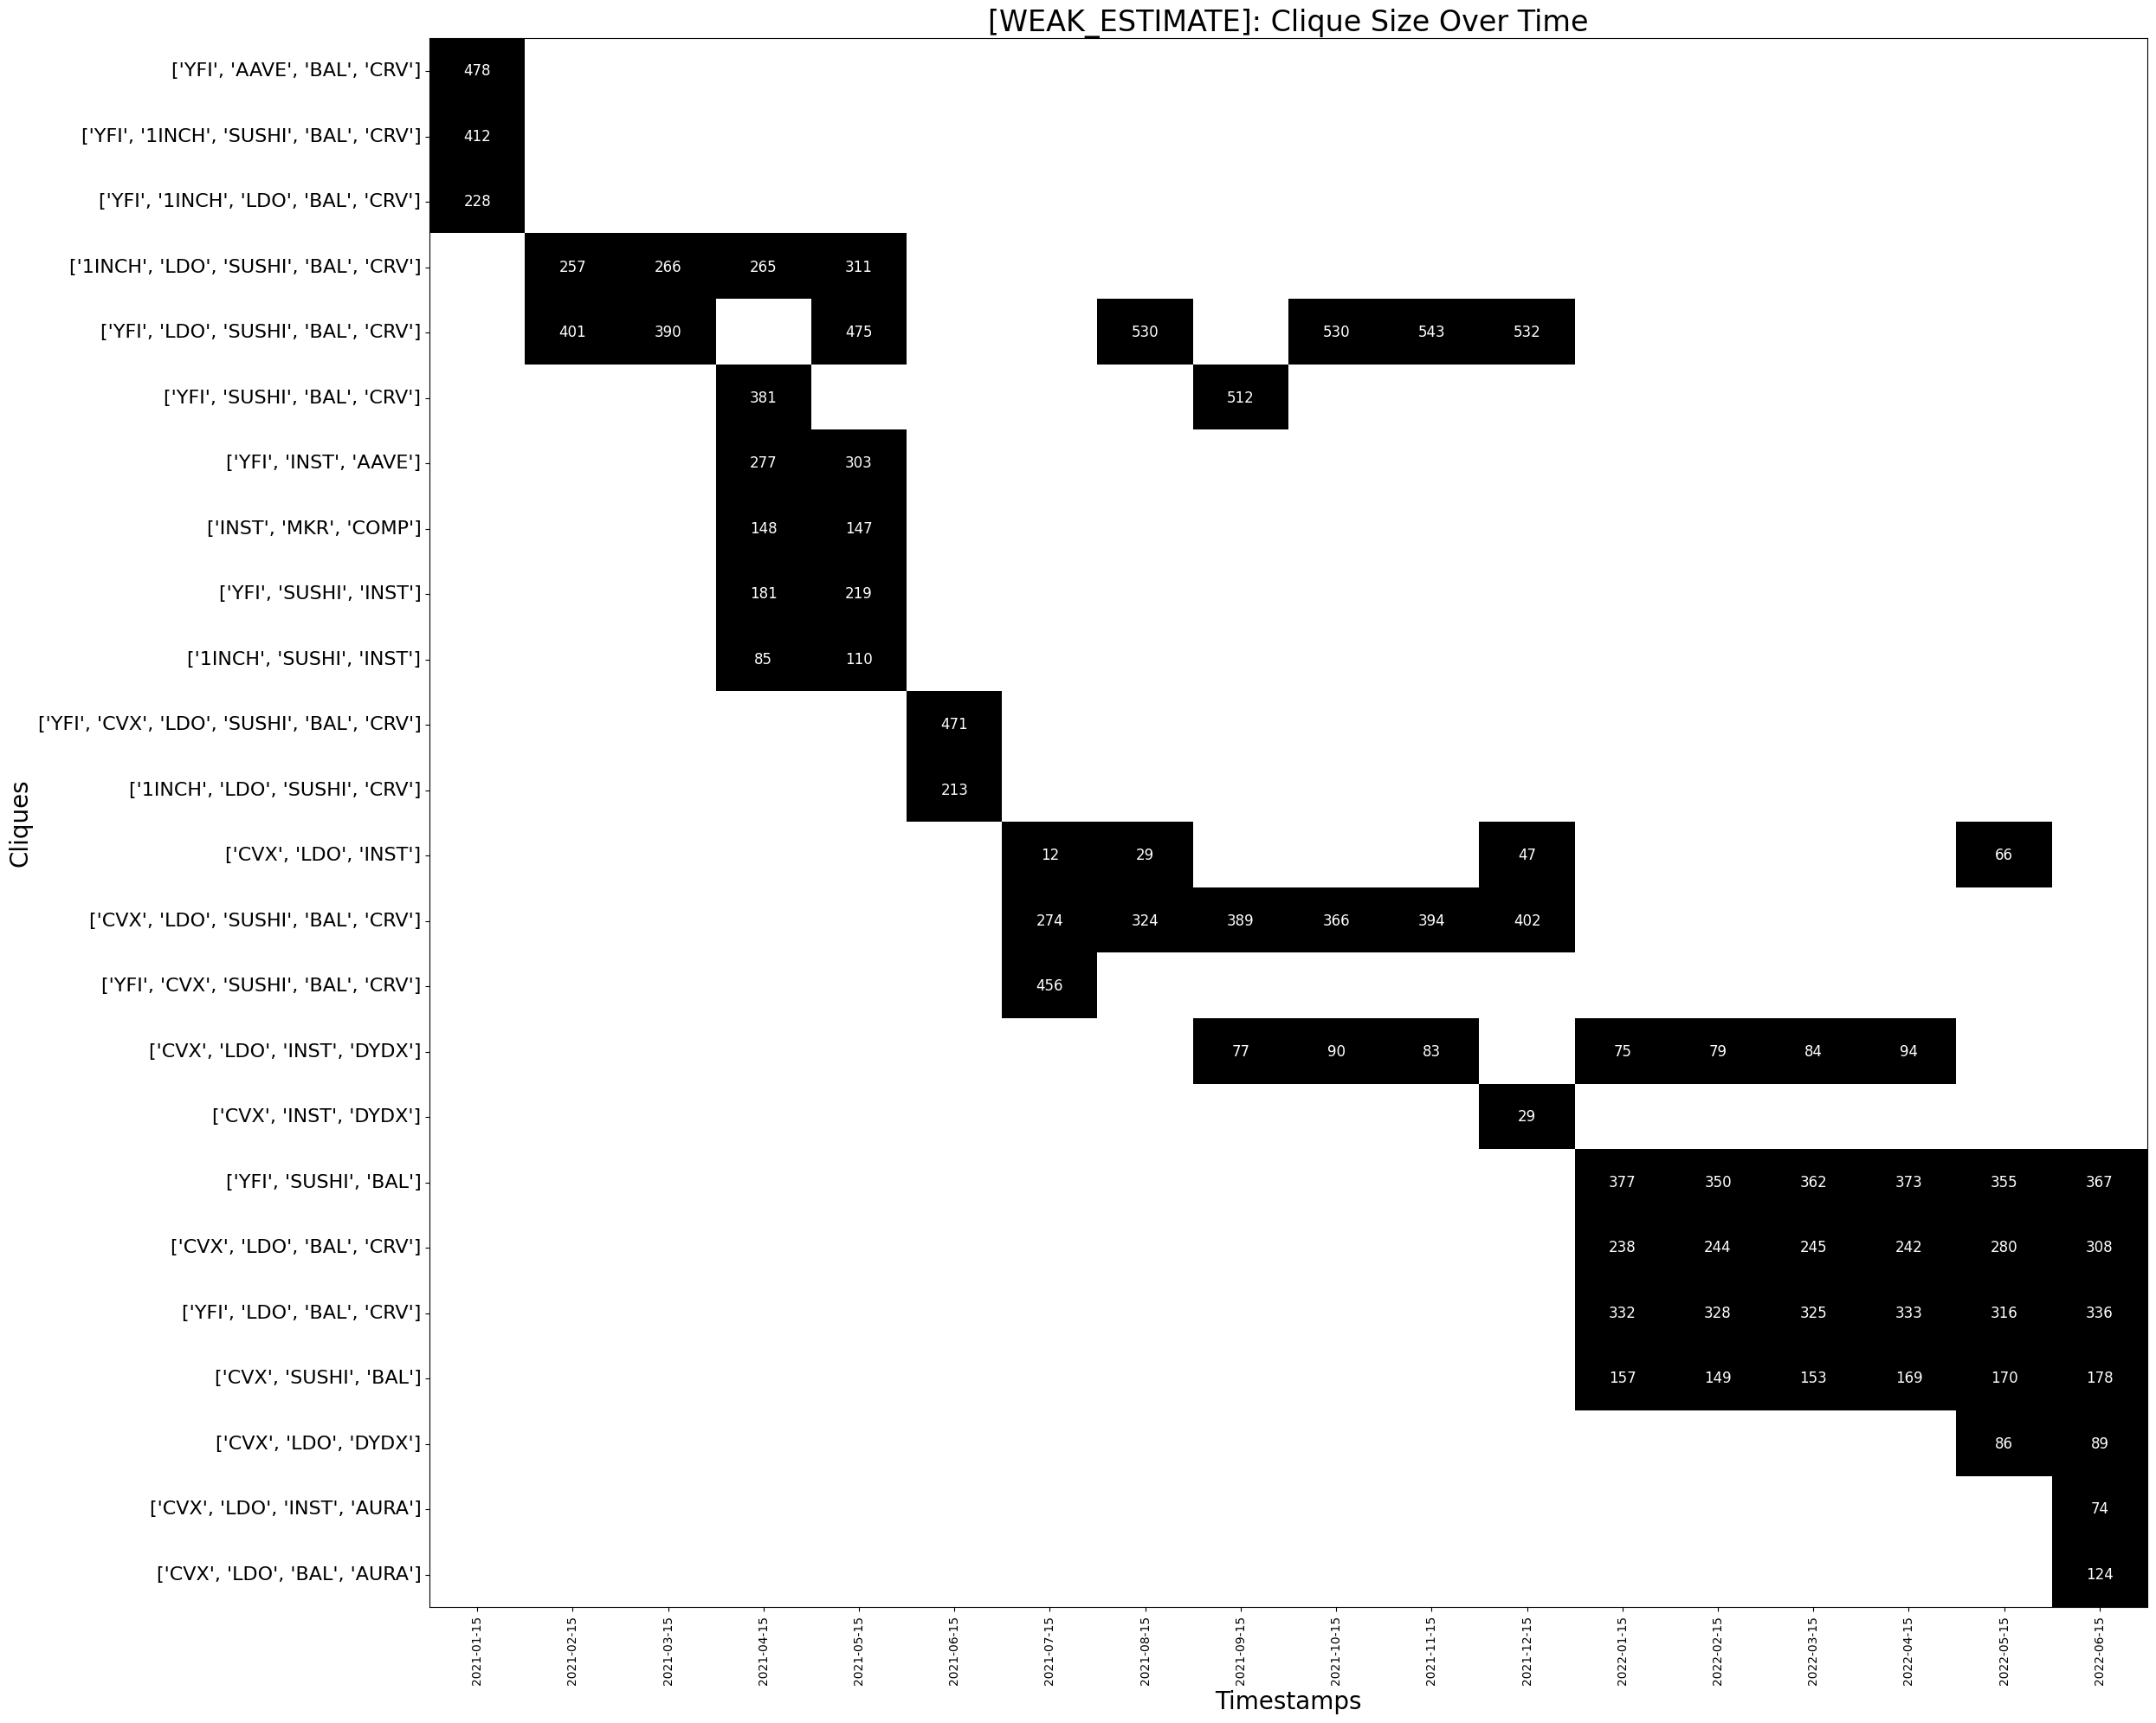

In [5]:
## show weak_estimate
plot_clique_size_over_time(metric_dataframes, method='weak_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

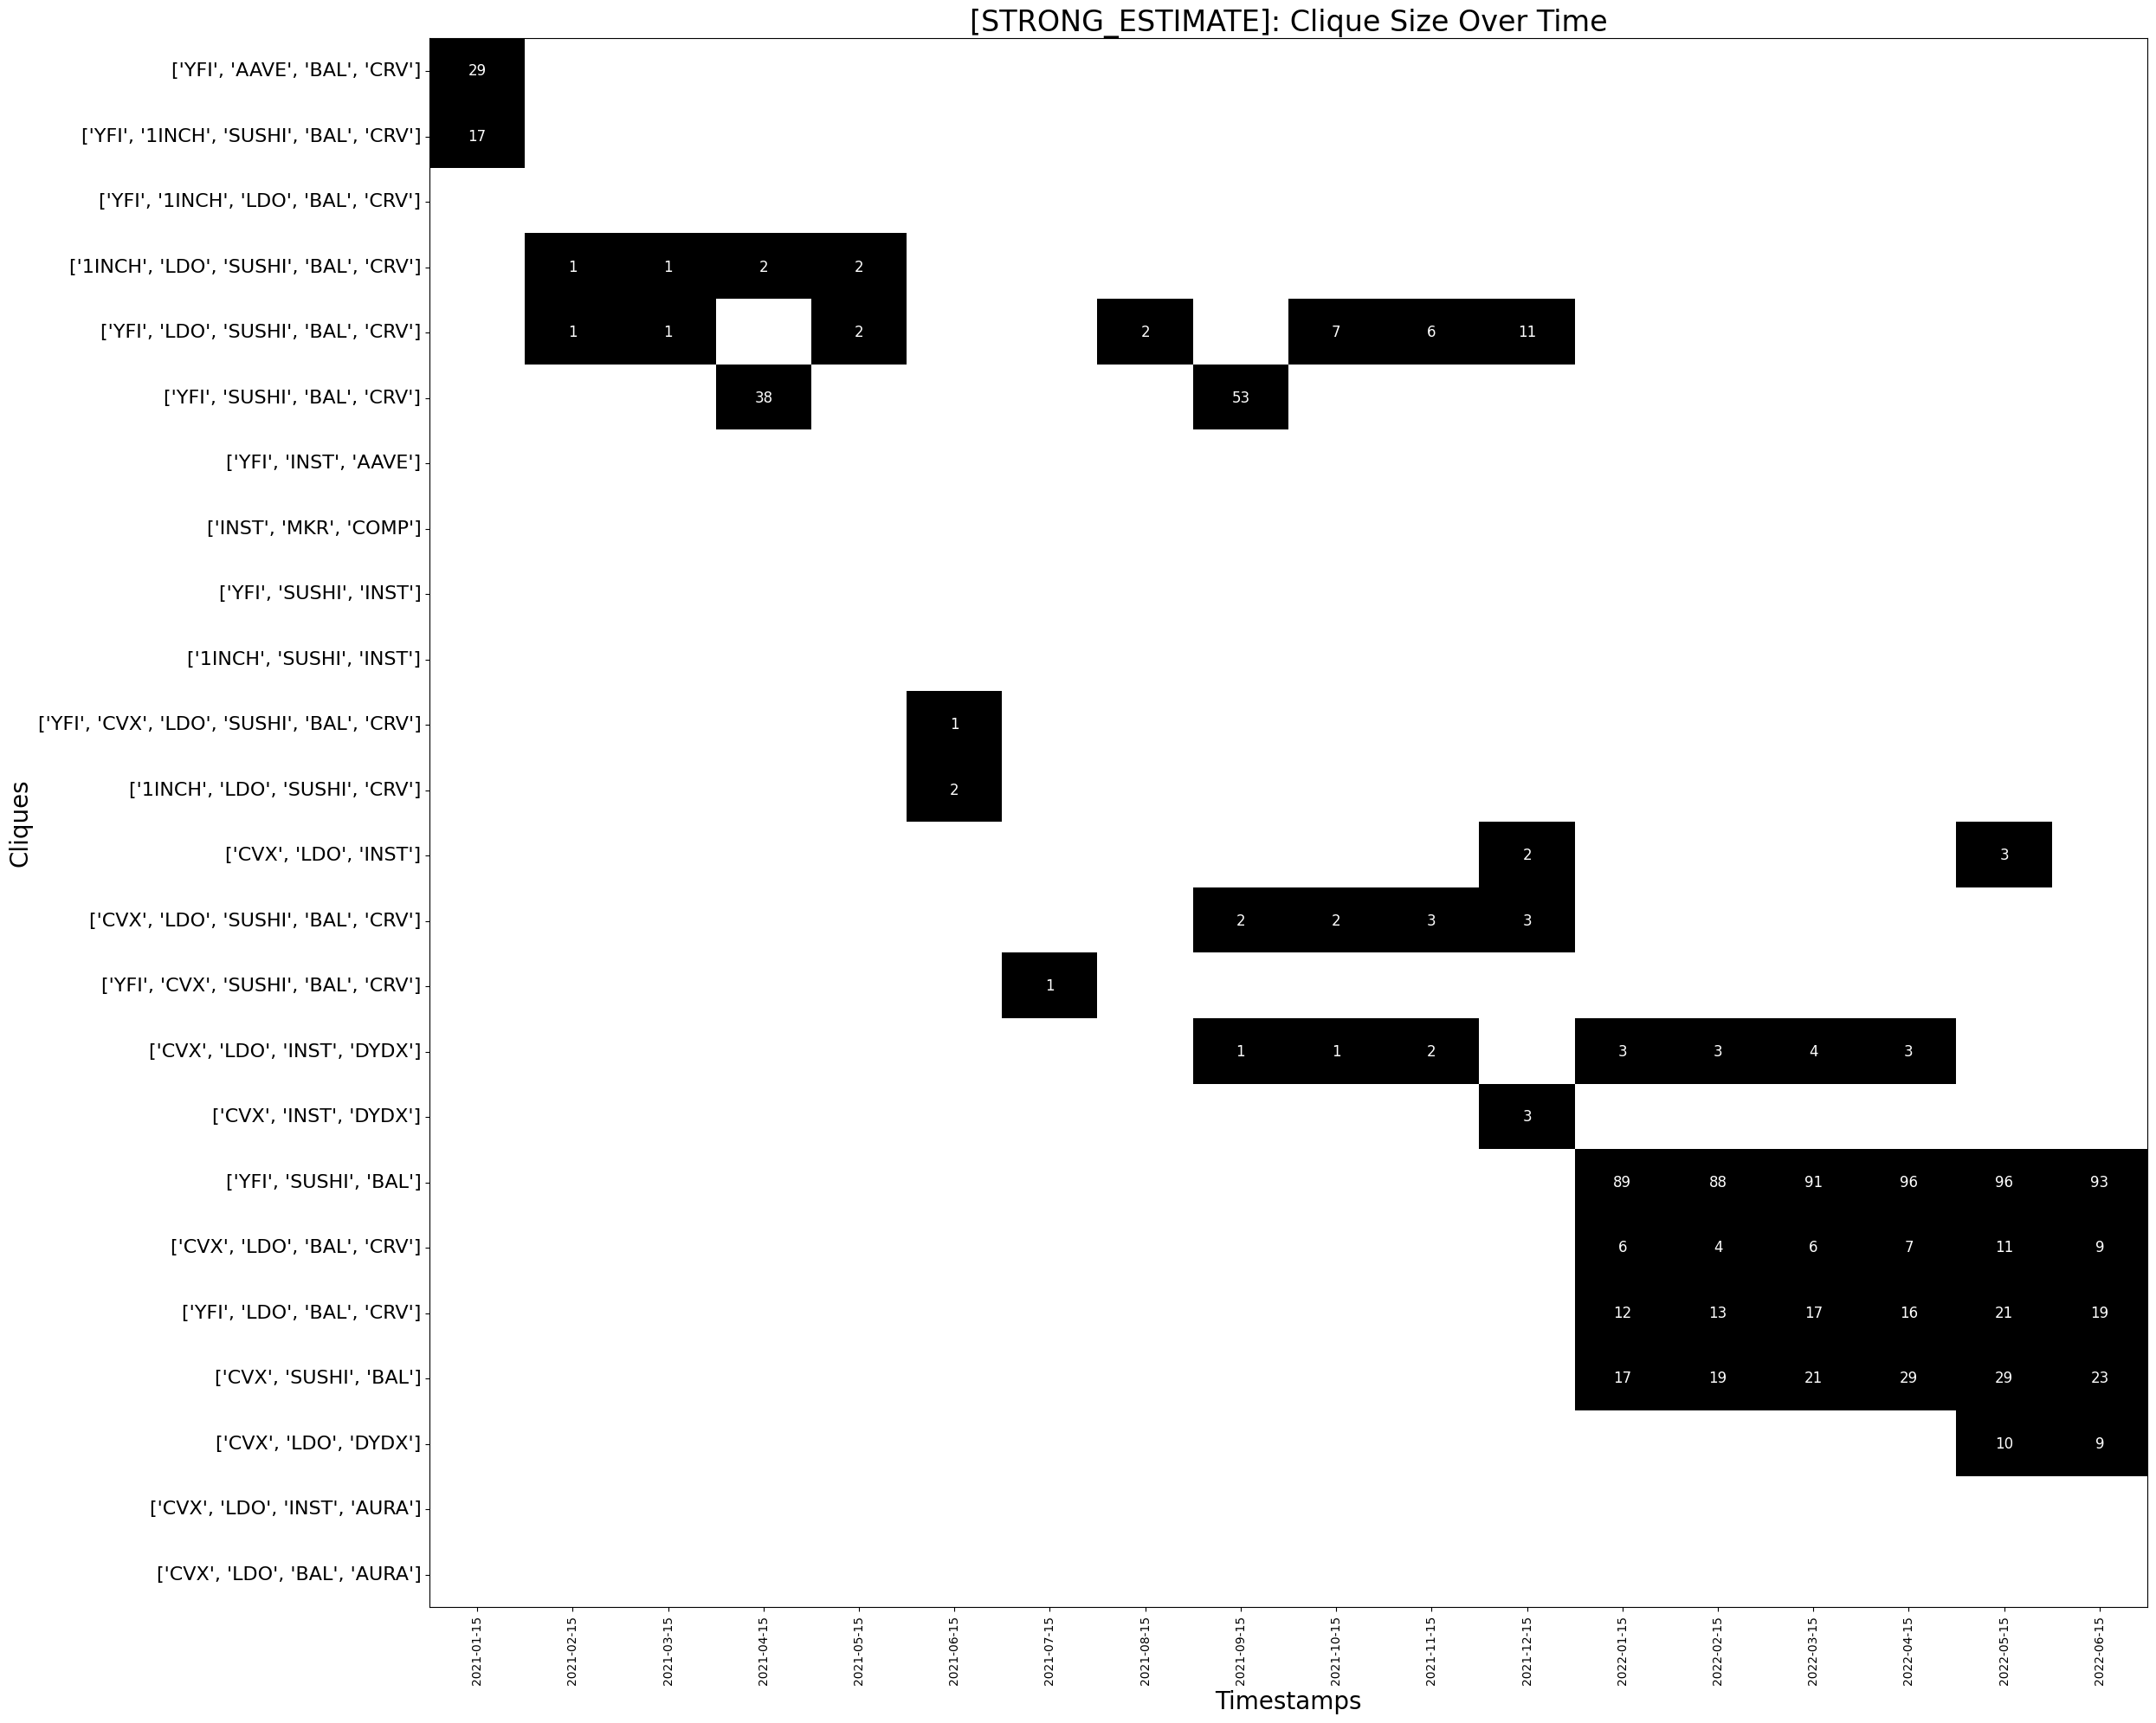

In [6]:
## show lower bound
plot_clique_size_over_time(metric_dataframes, method='strong_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

### Fig: clique growth over time 

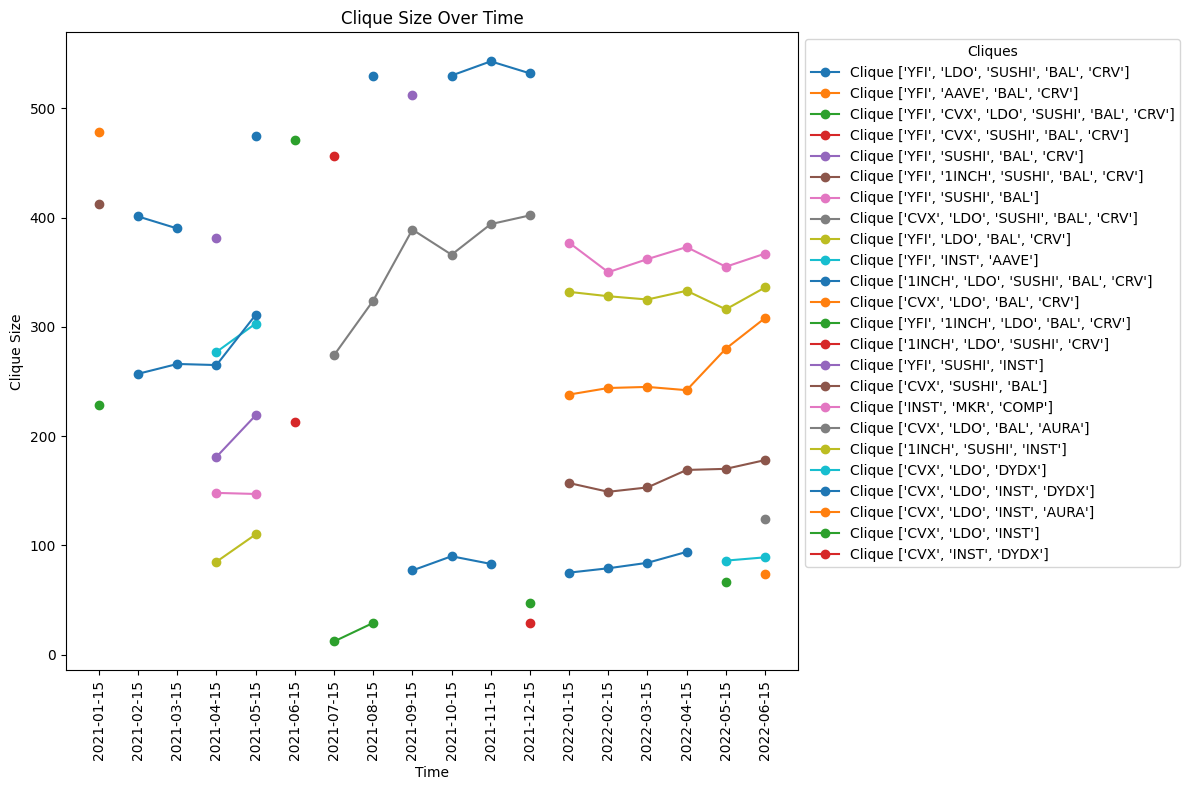

In [7]:
plot_clique_growth_over_time(metric_dataframes, method='weak_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)


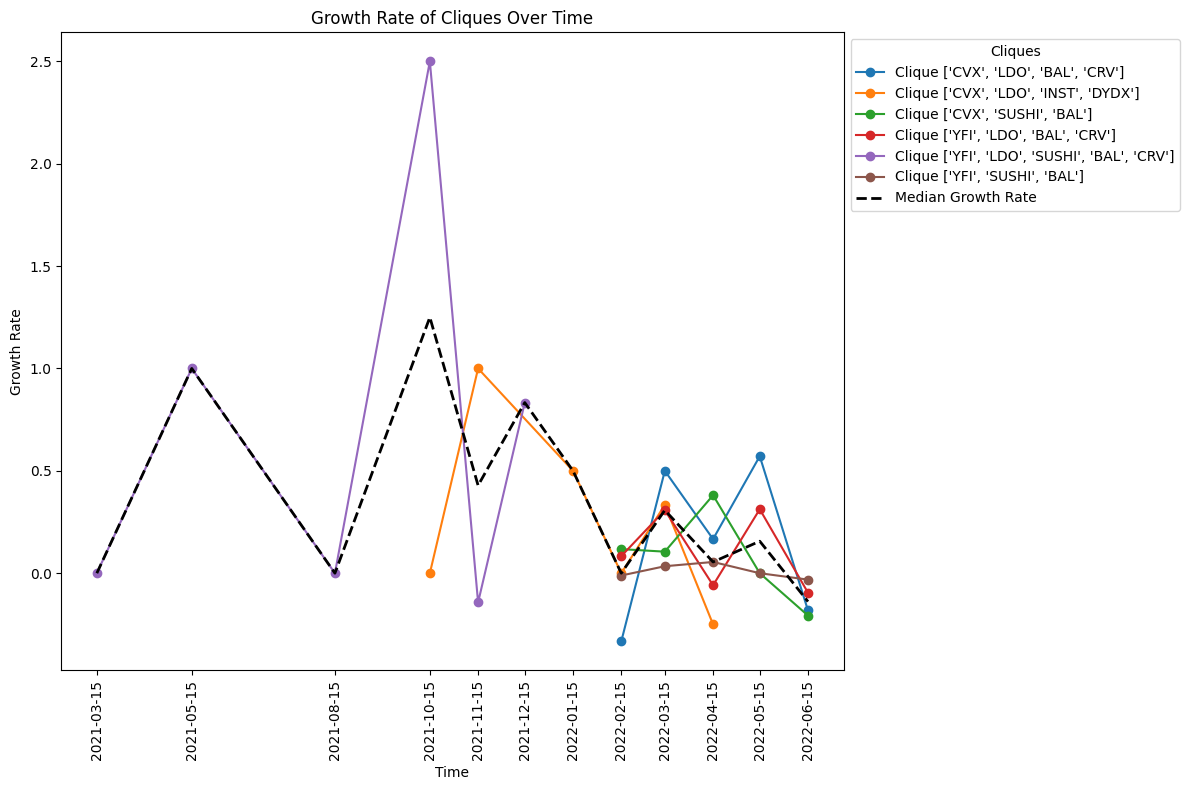

In [8]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_clique_growth_rate_over_time(metric_dataframes, method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)


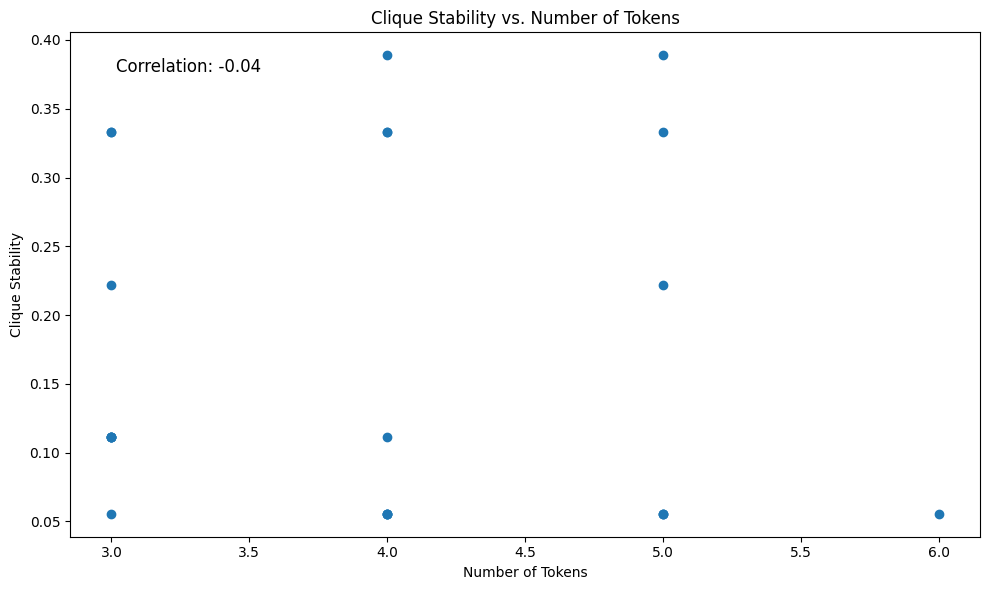

In [10]:
plot_clique_stability_vs_no_of_tokens(metric_dataframes, method='weak_estimate', output_path="output/cliques/", save=False, show=True)

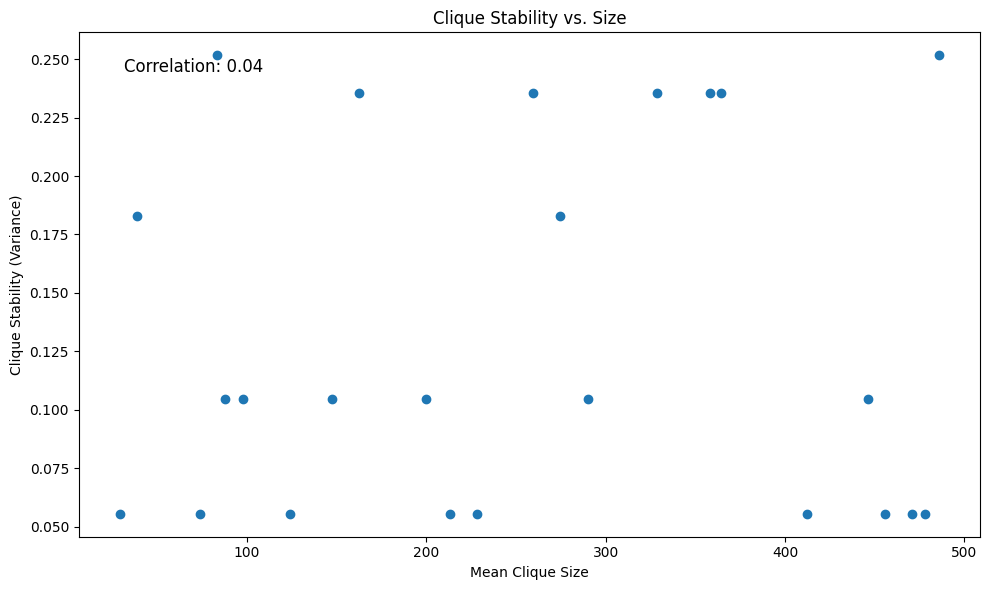

In [11]:
plot_clique_stability_vs_size(metric_dataframes, method='weak_estimate', output_path="output/cliques/", save=False, show=True)

### Fig: total_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


FileNotFoundError: [Errno 2] No such file or directory: '/home/xm3van/research-project-erc20-governance/notebooks/output/cliques/total_influence_clique.png'

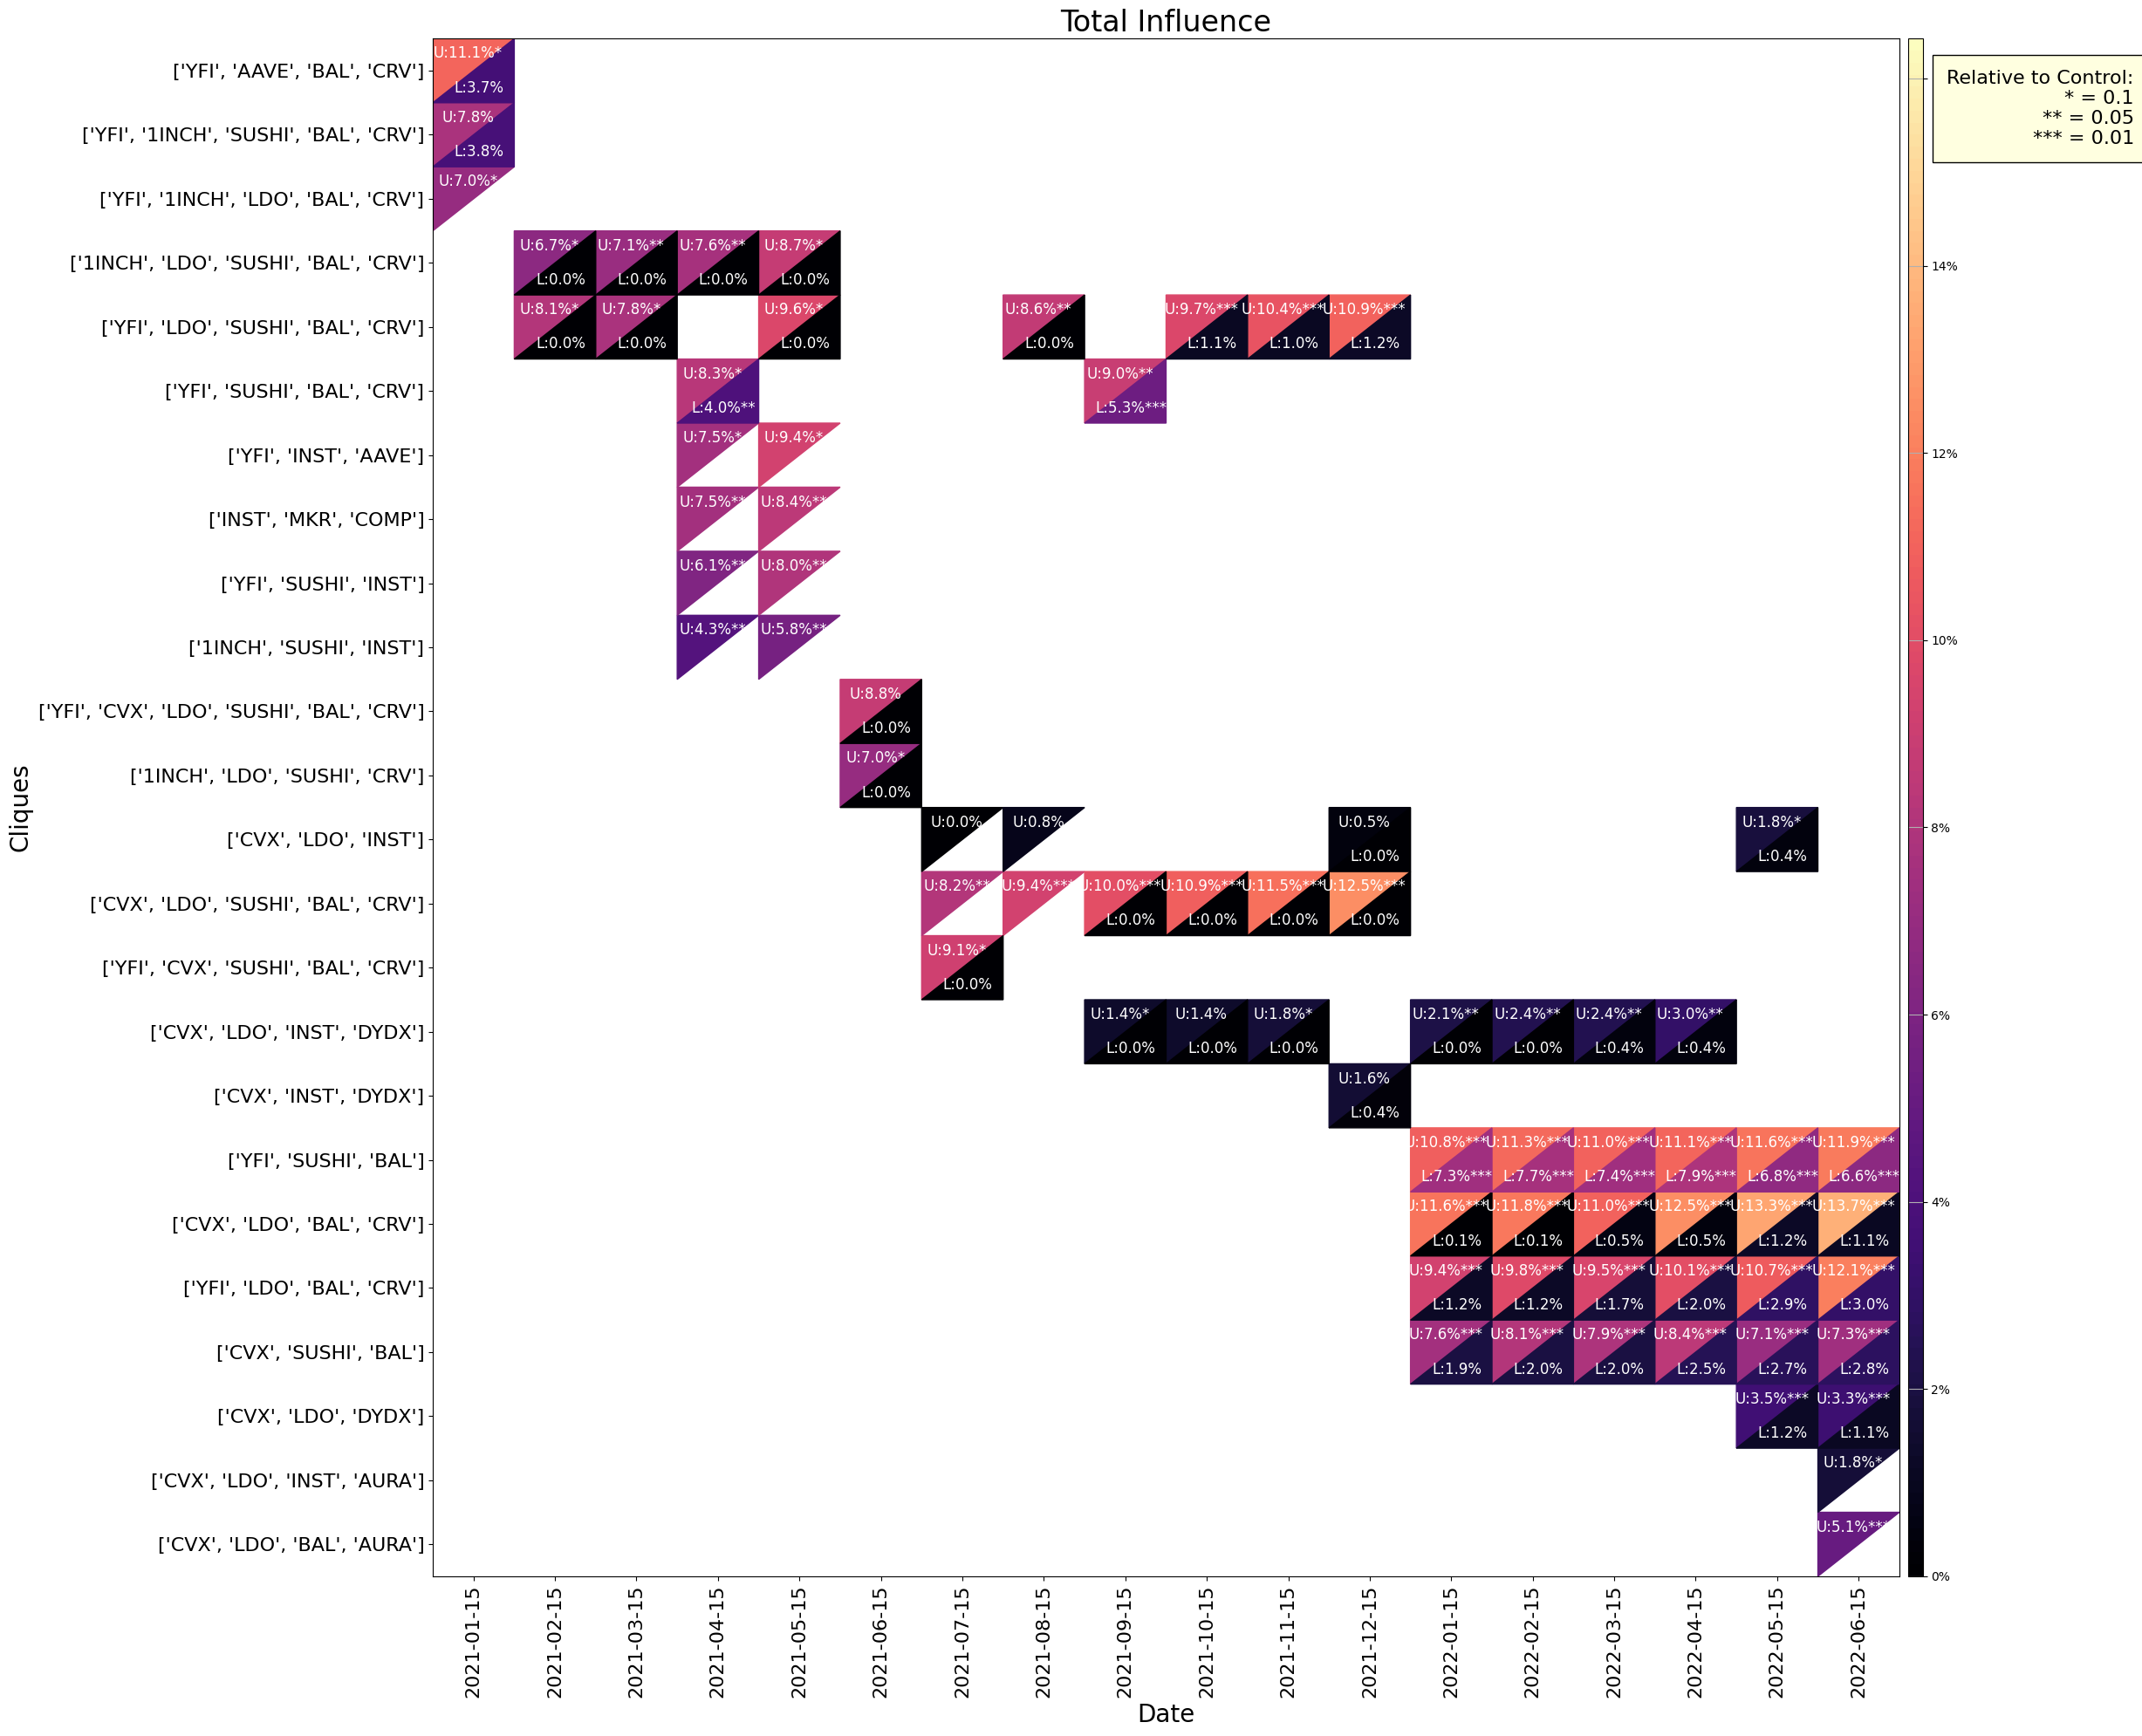

In [12]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True, log=False, output_path="output/cliques/",  save=True, show=True)

### Fig: gini_total_influence

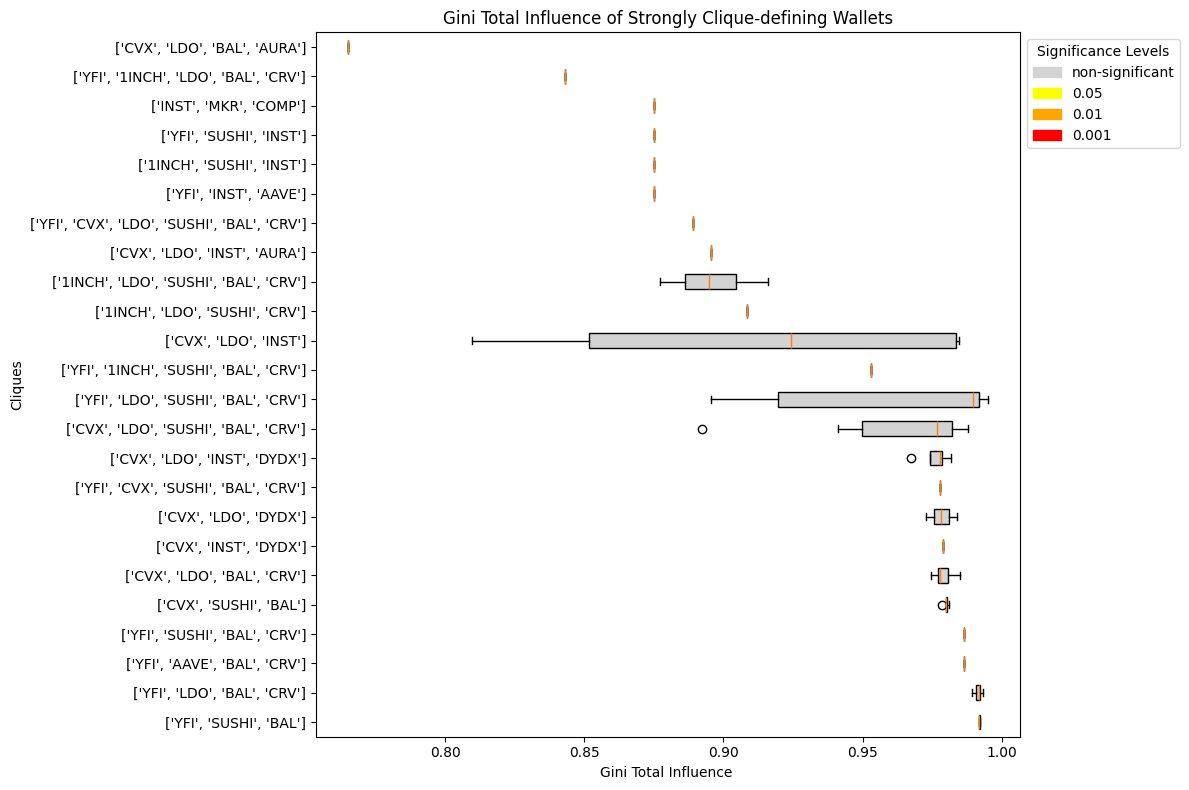

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='strong_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)

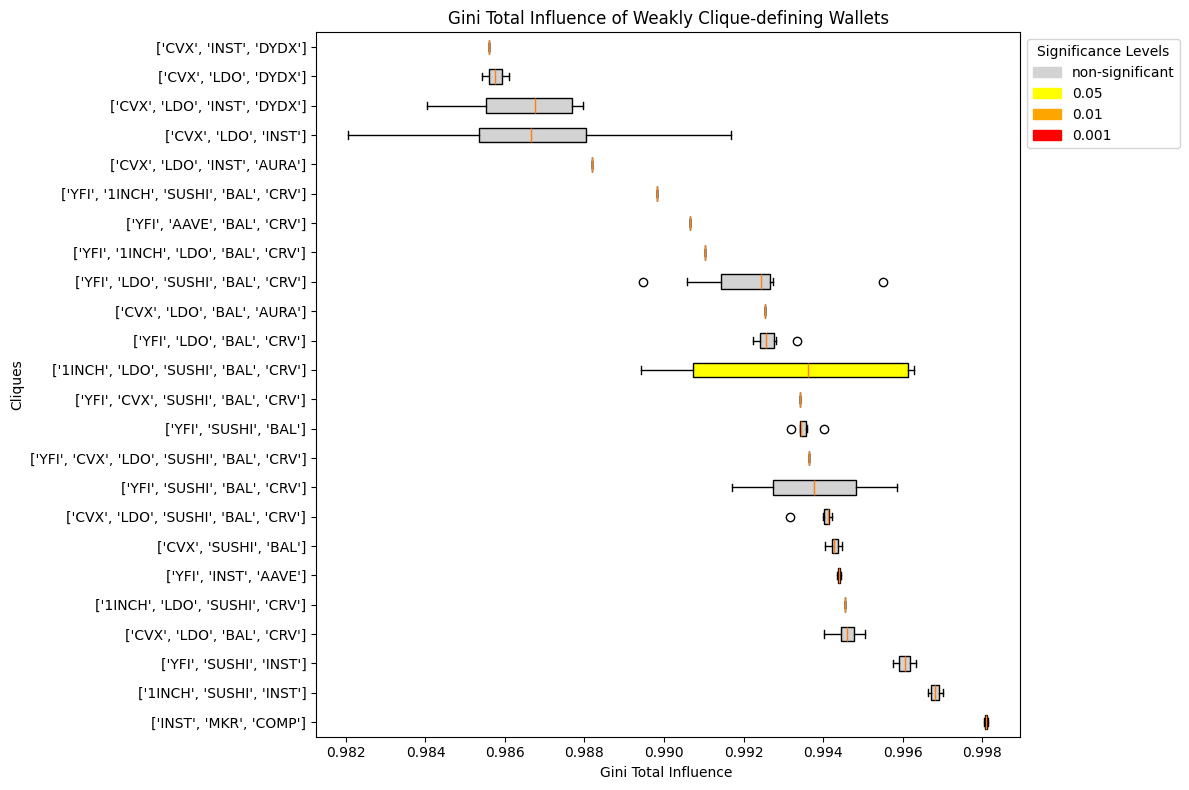

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='weak_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)

### Fig: internal_influence 

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


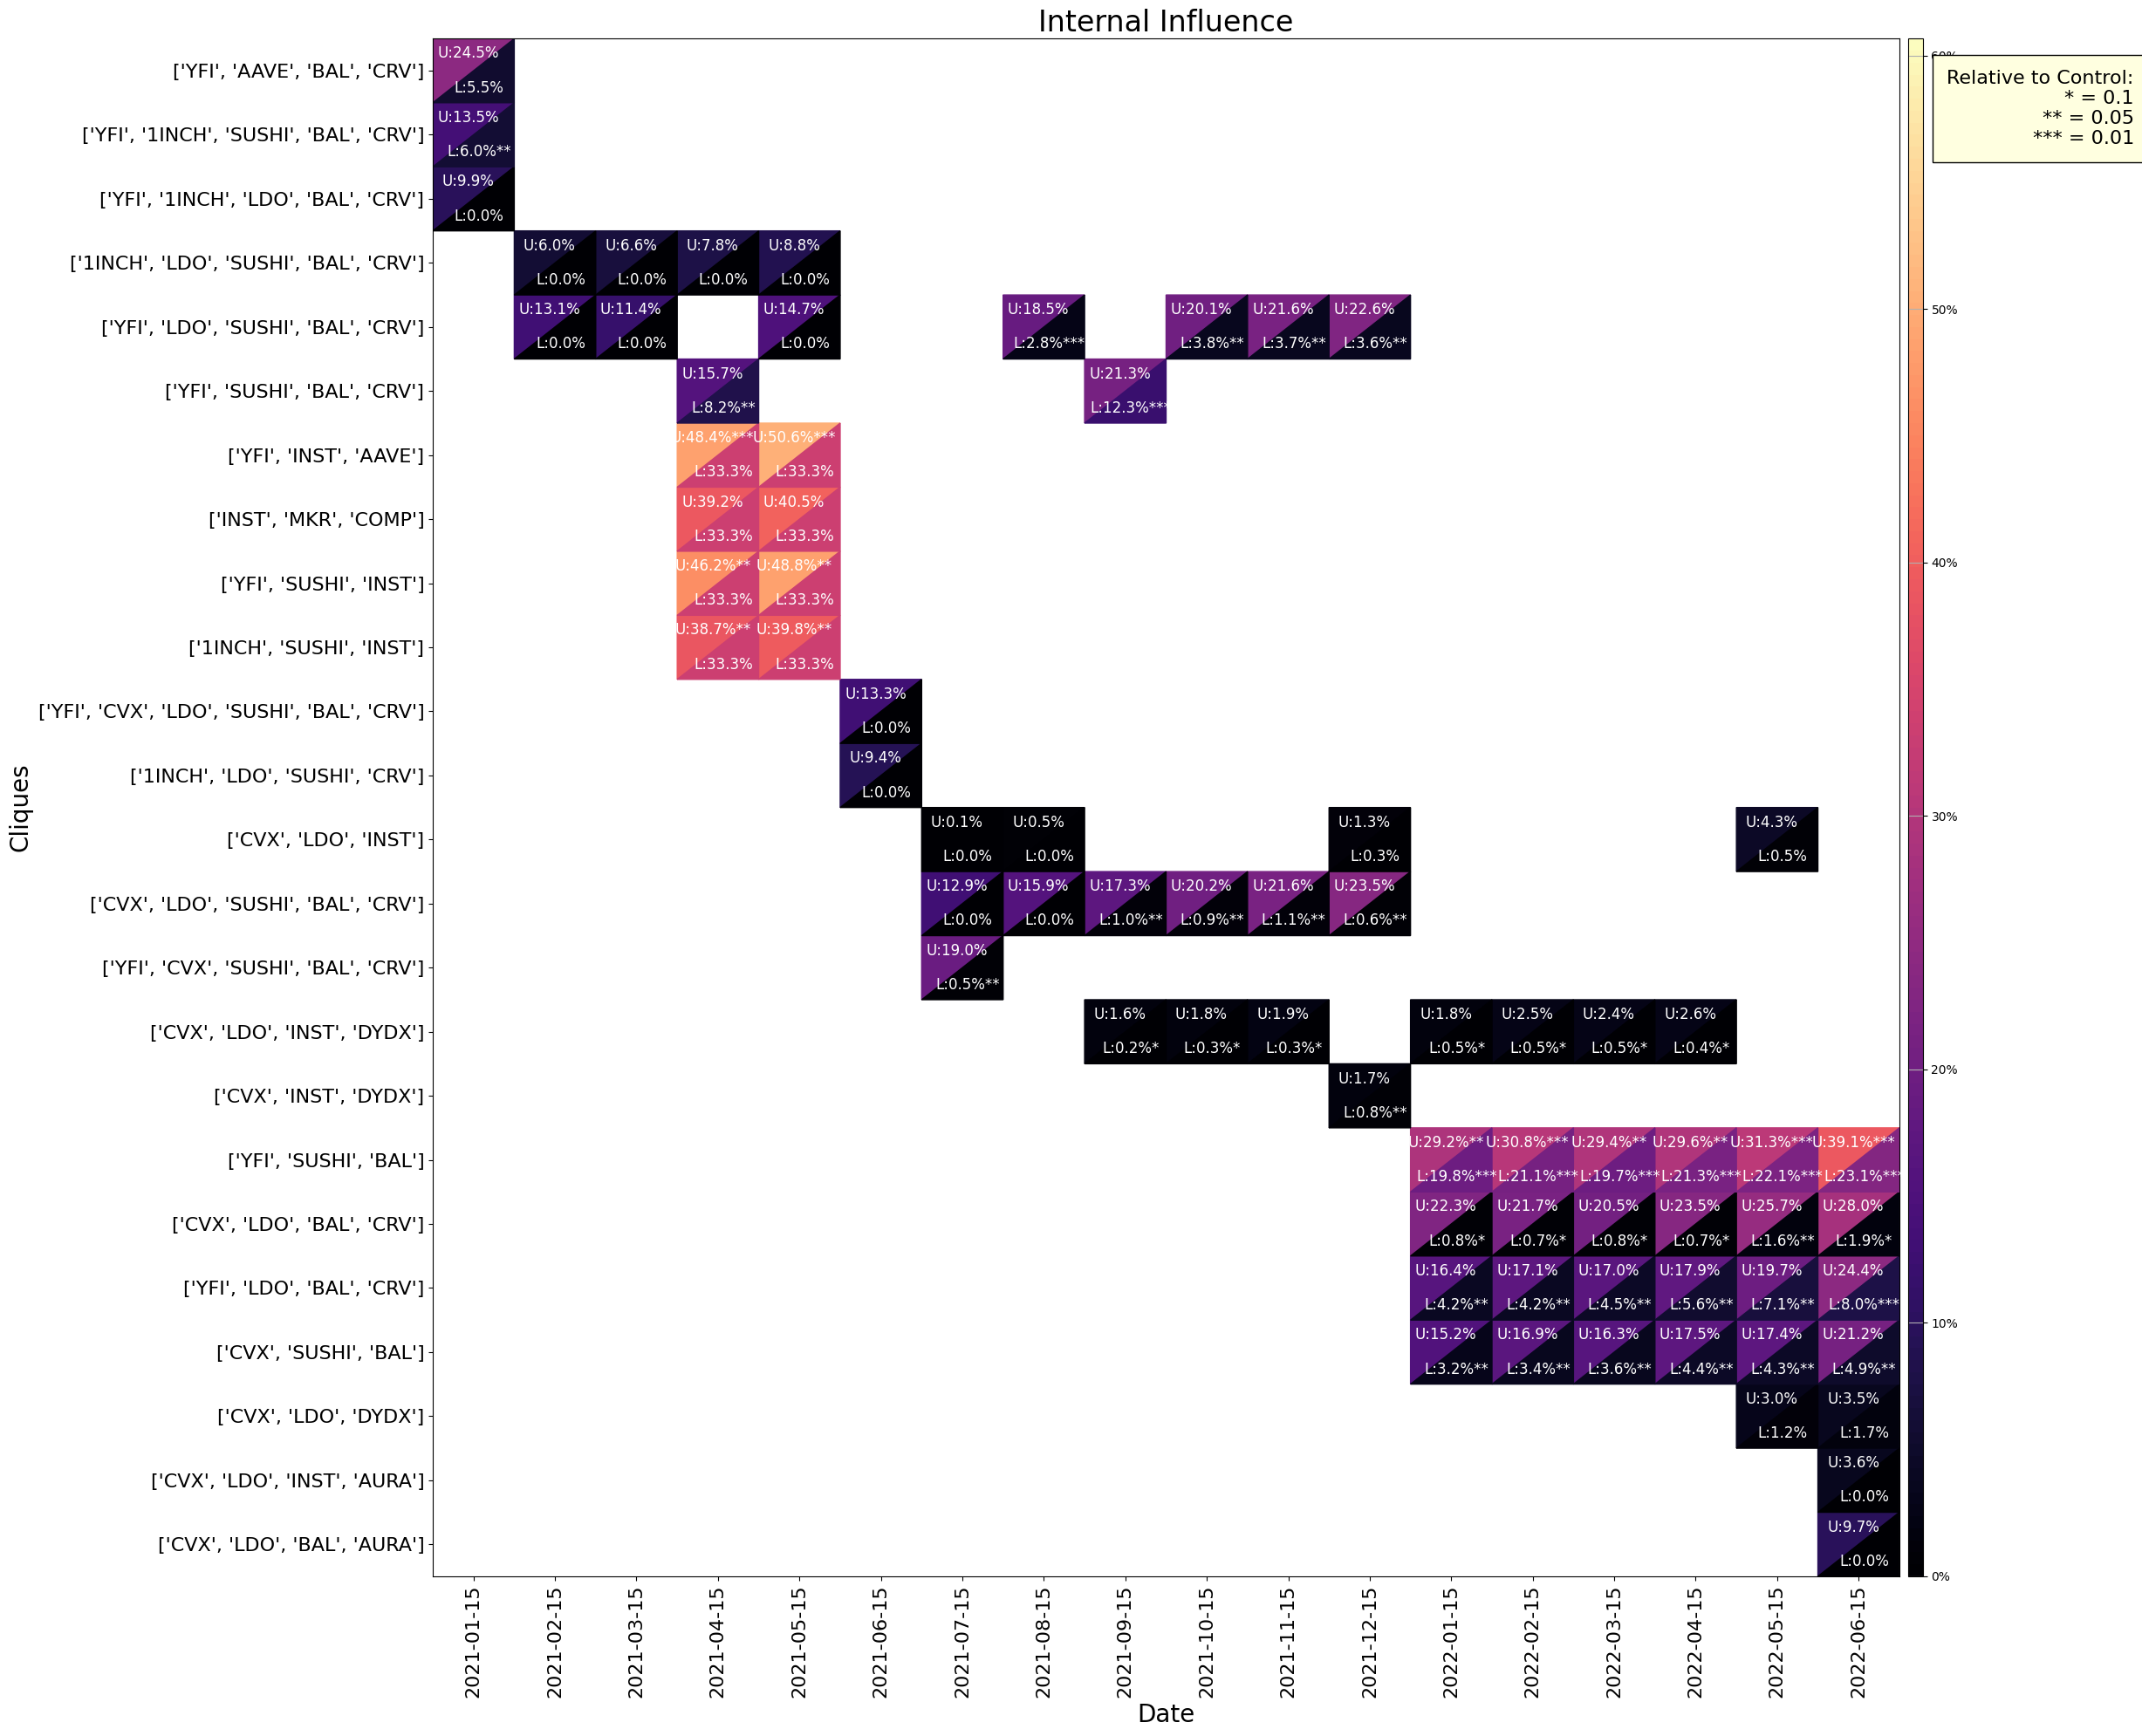

In [ ]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_internal_influence

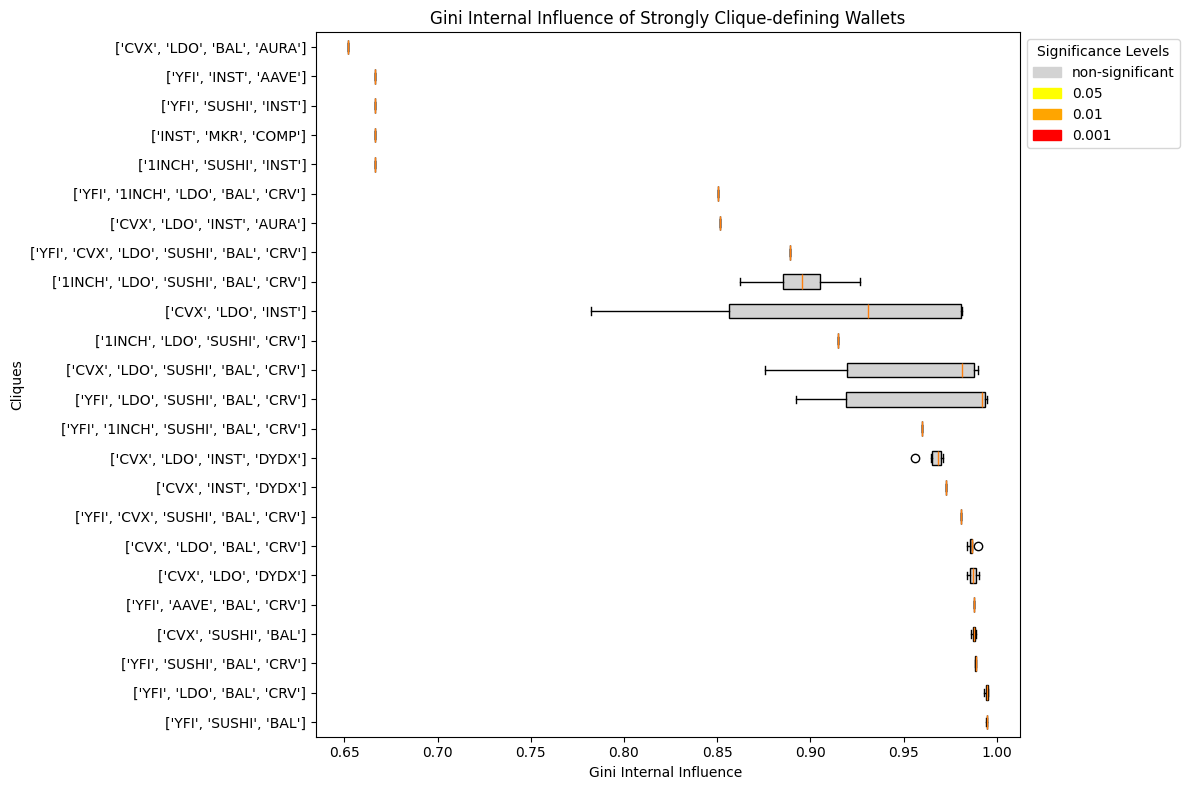

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

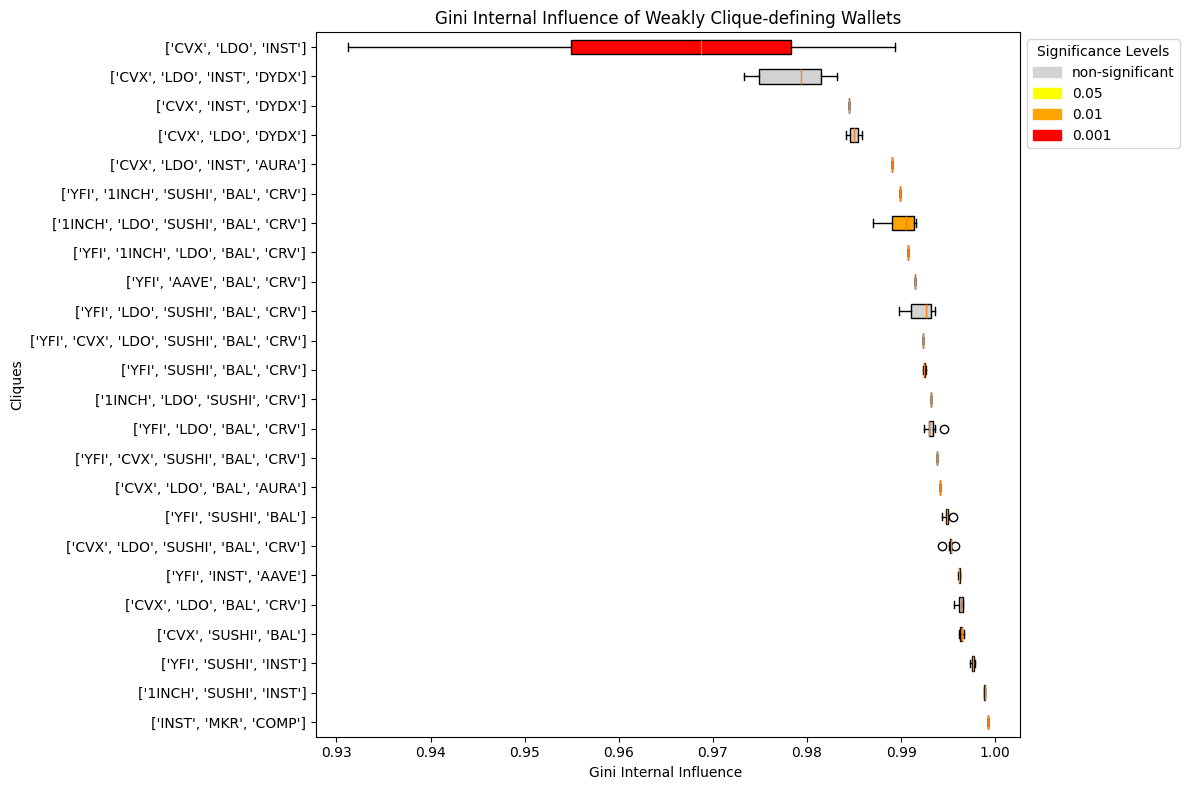

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='weak_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: external_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


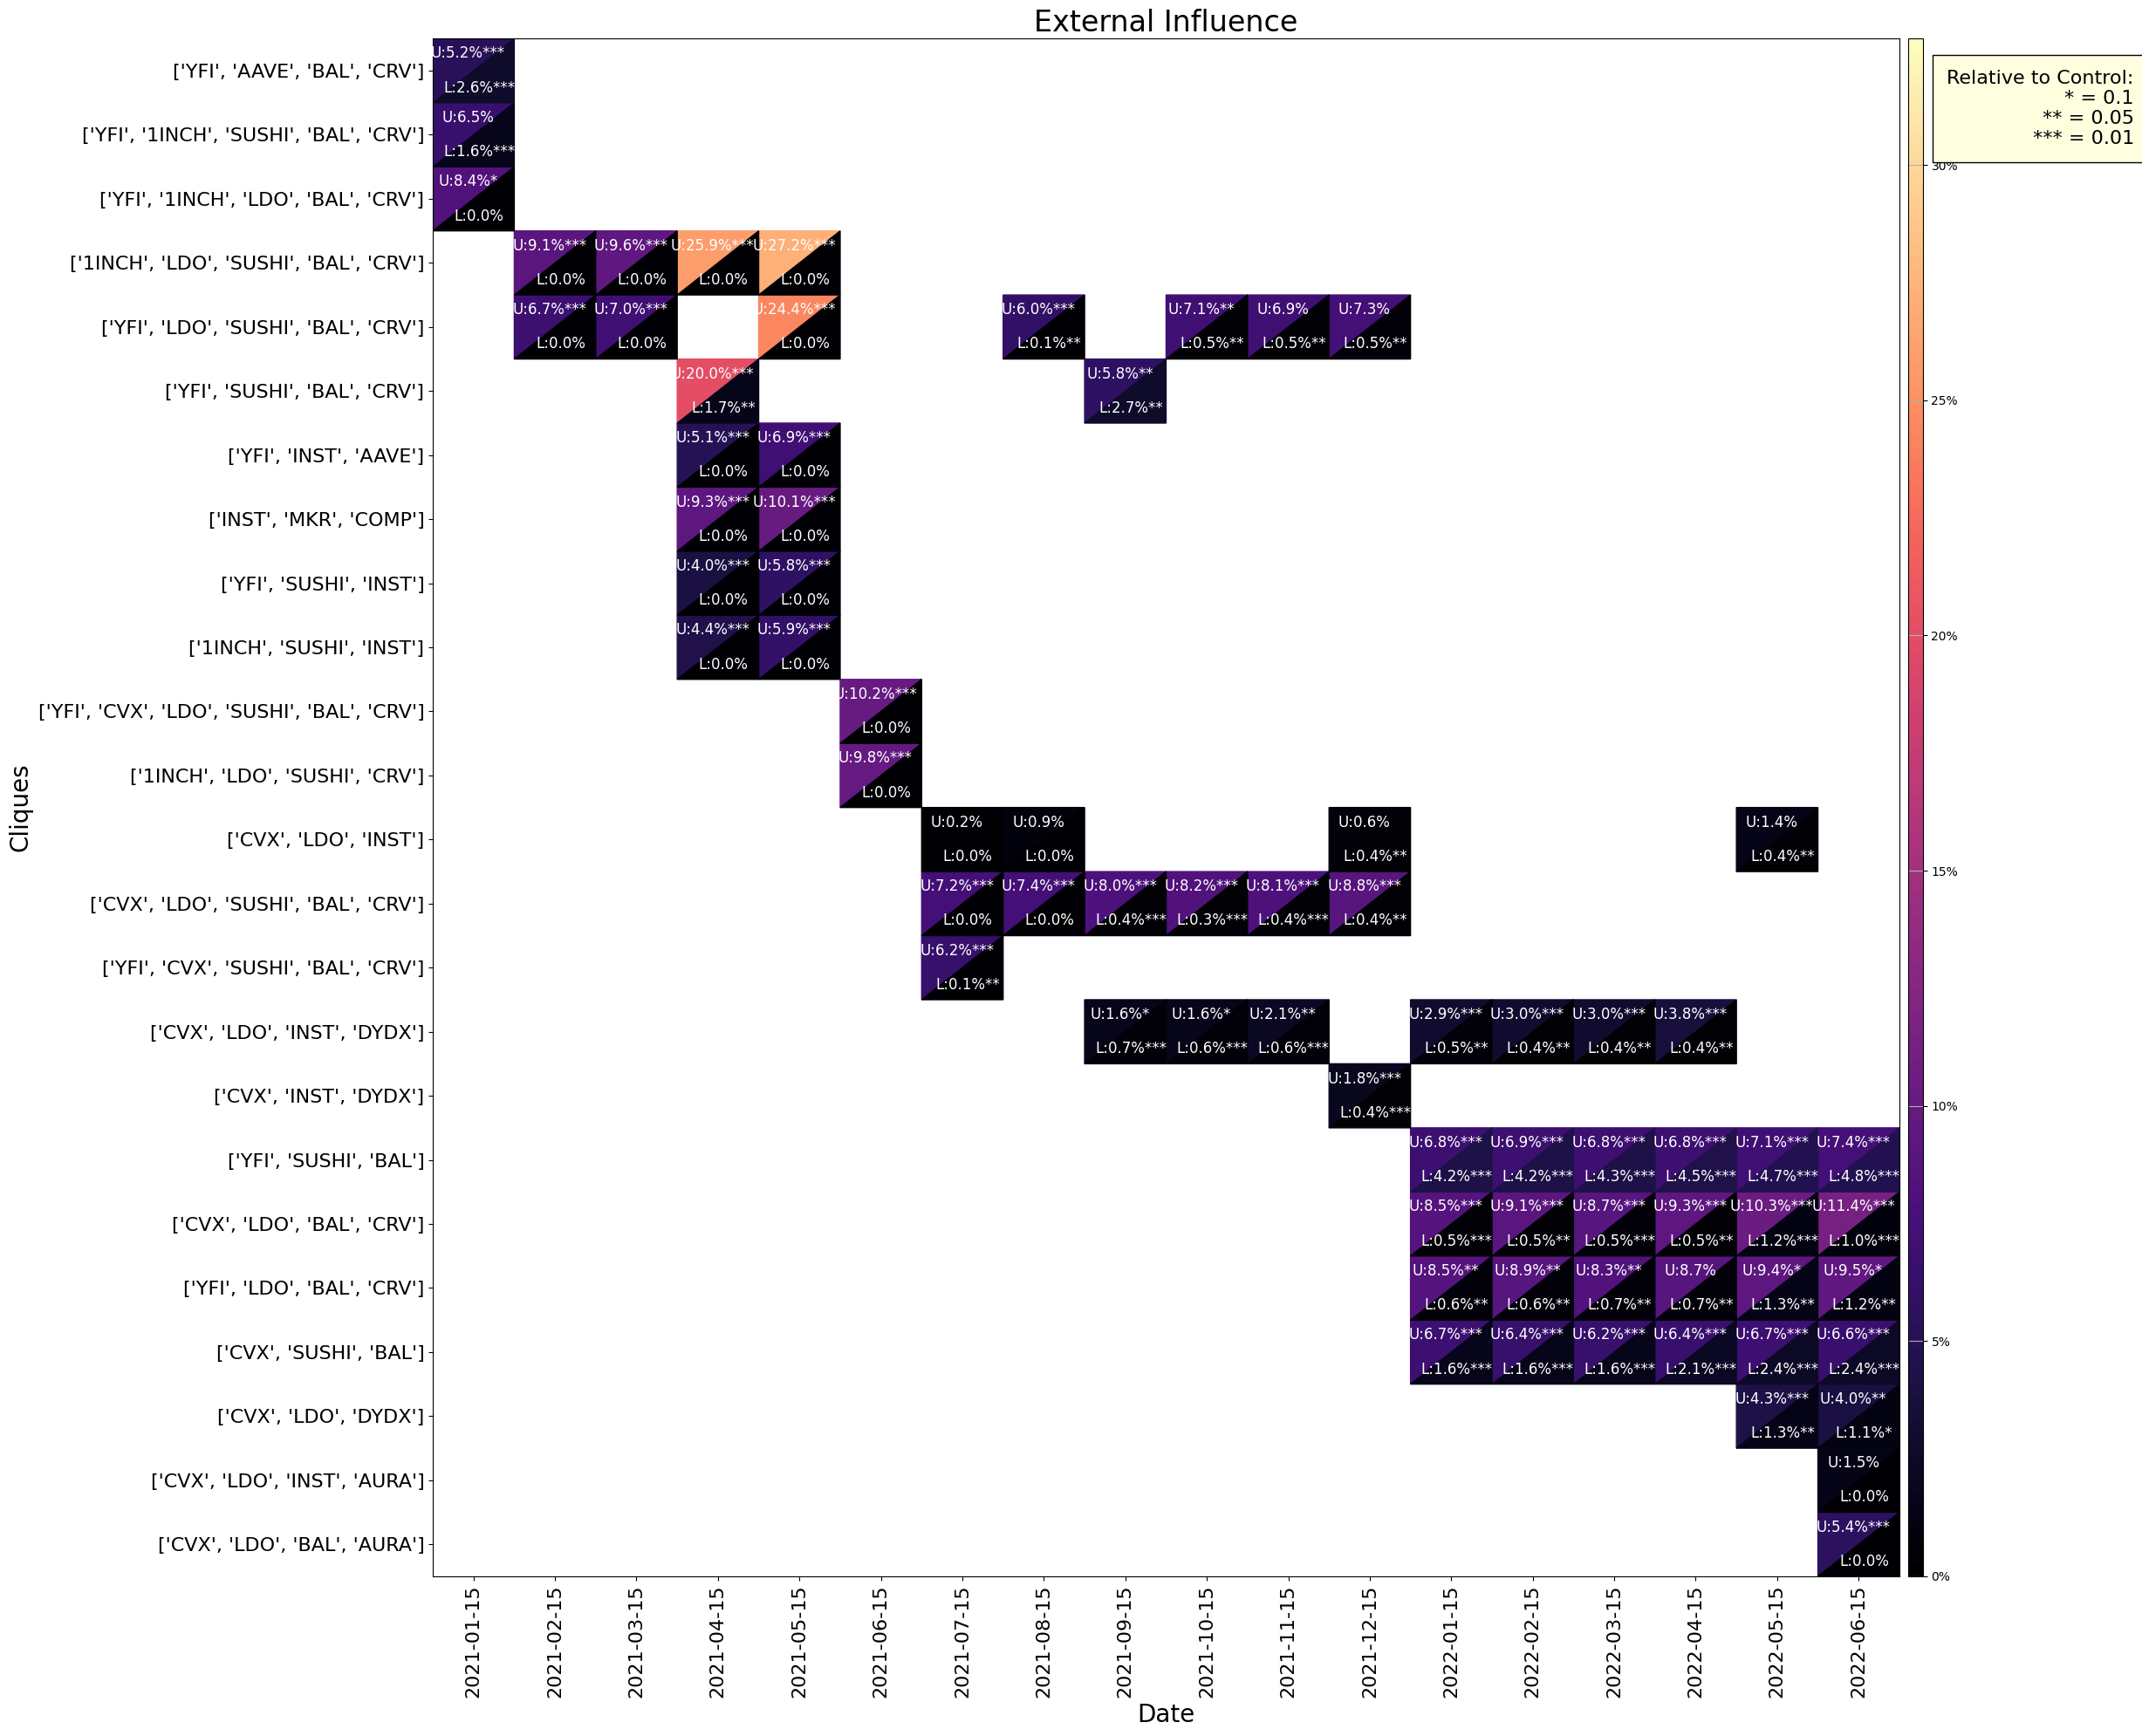

In [ ]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_external_influence

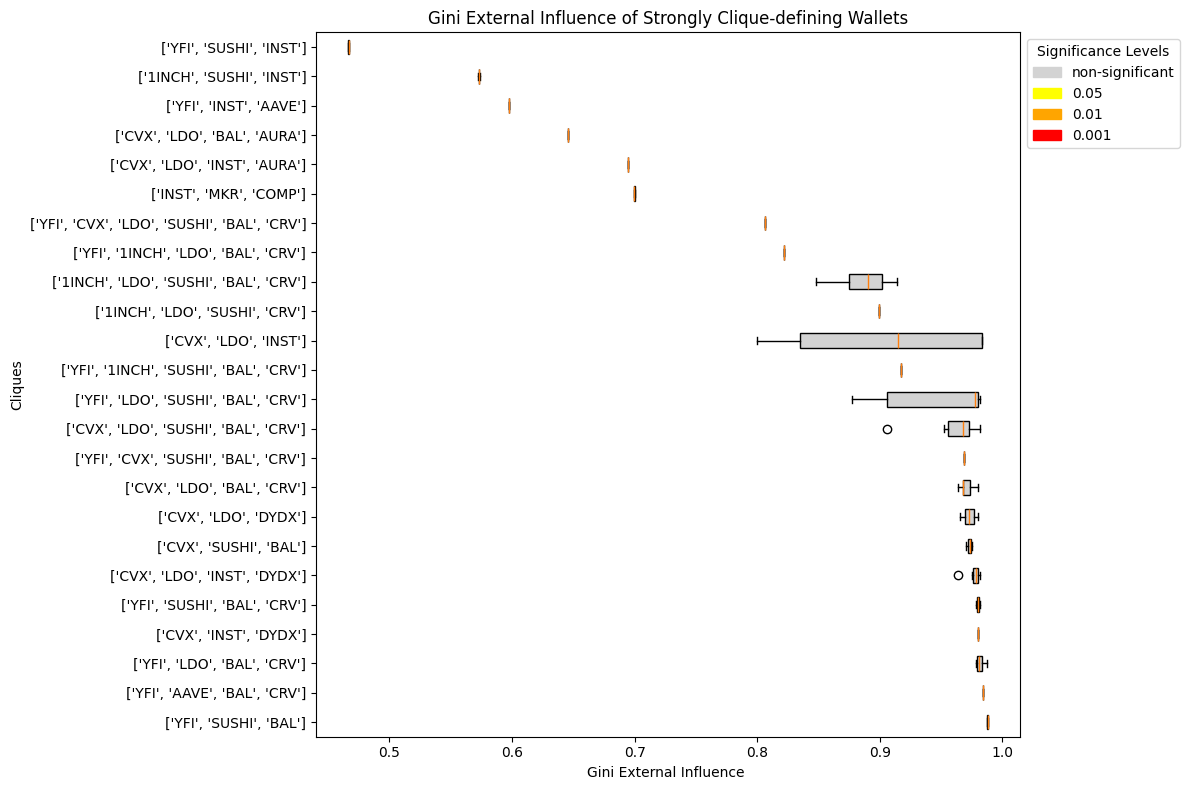

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

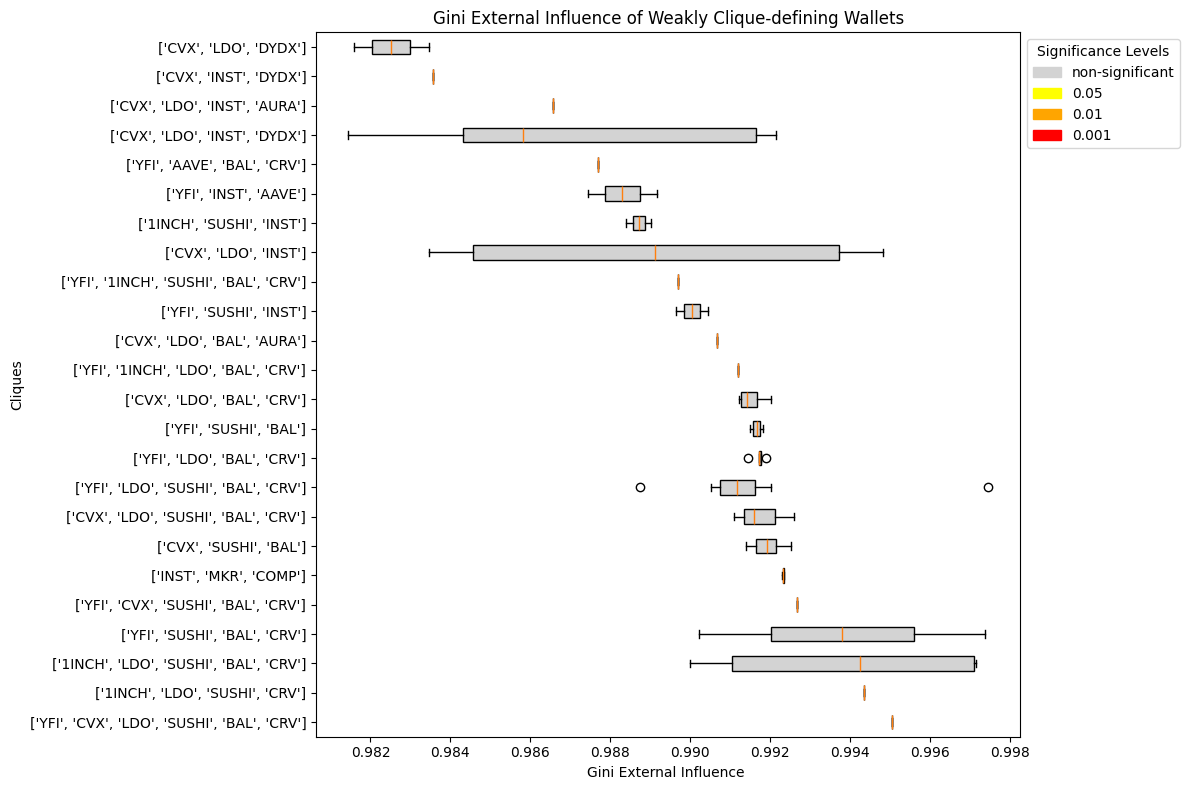

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='weak_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: wealth_clique

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


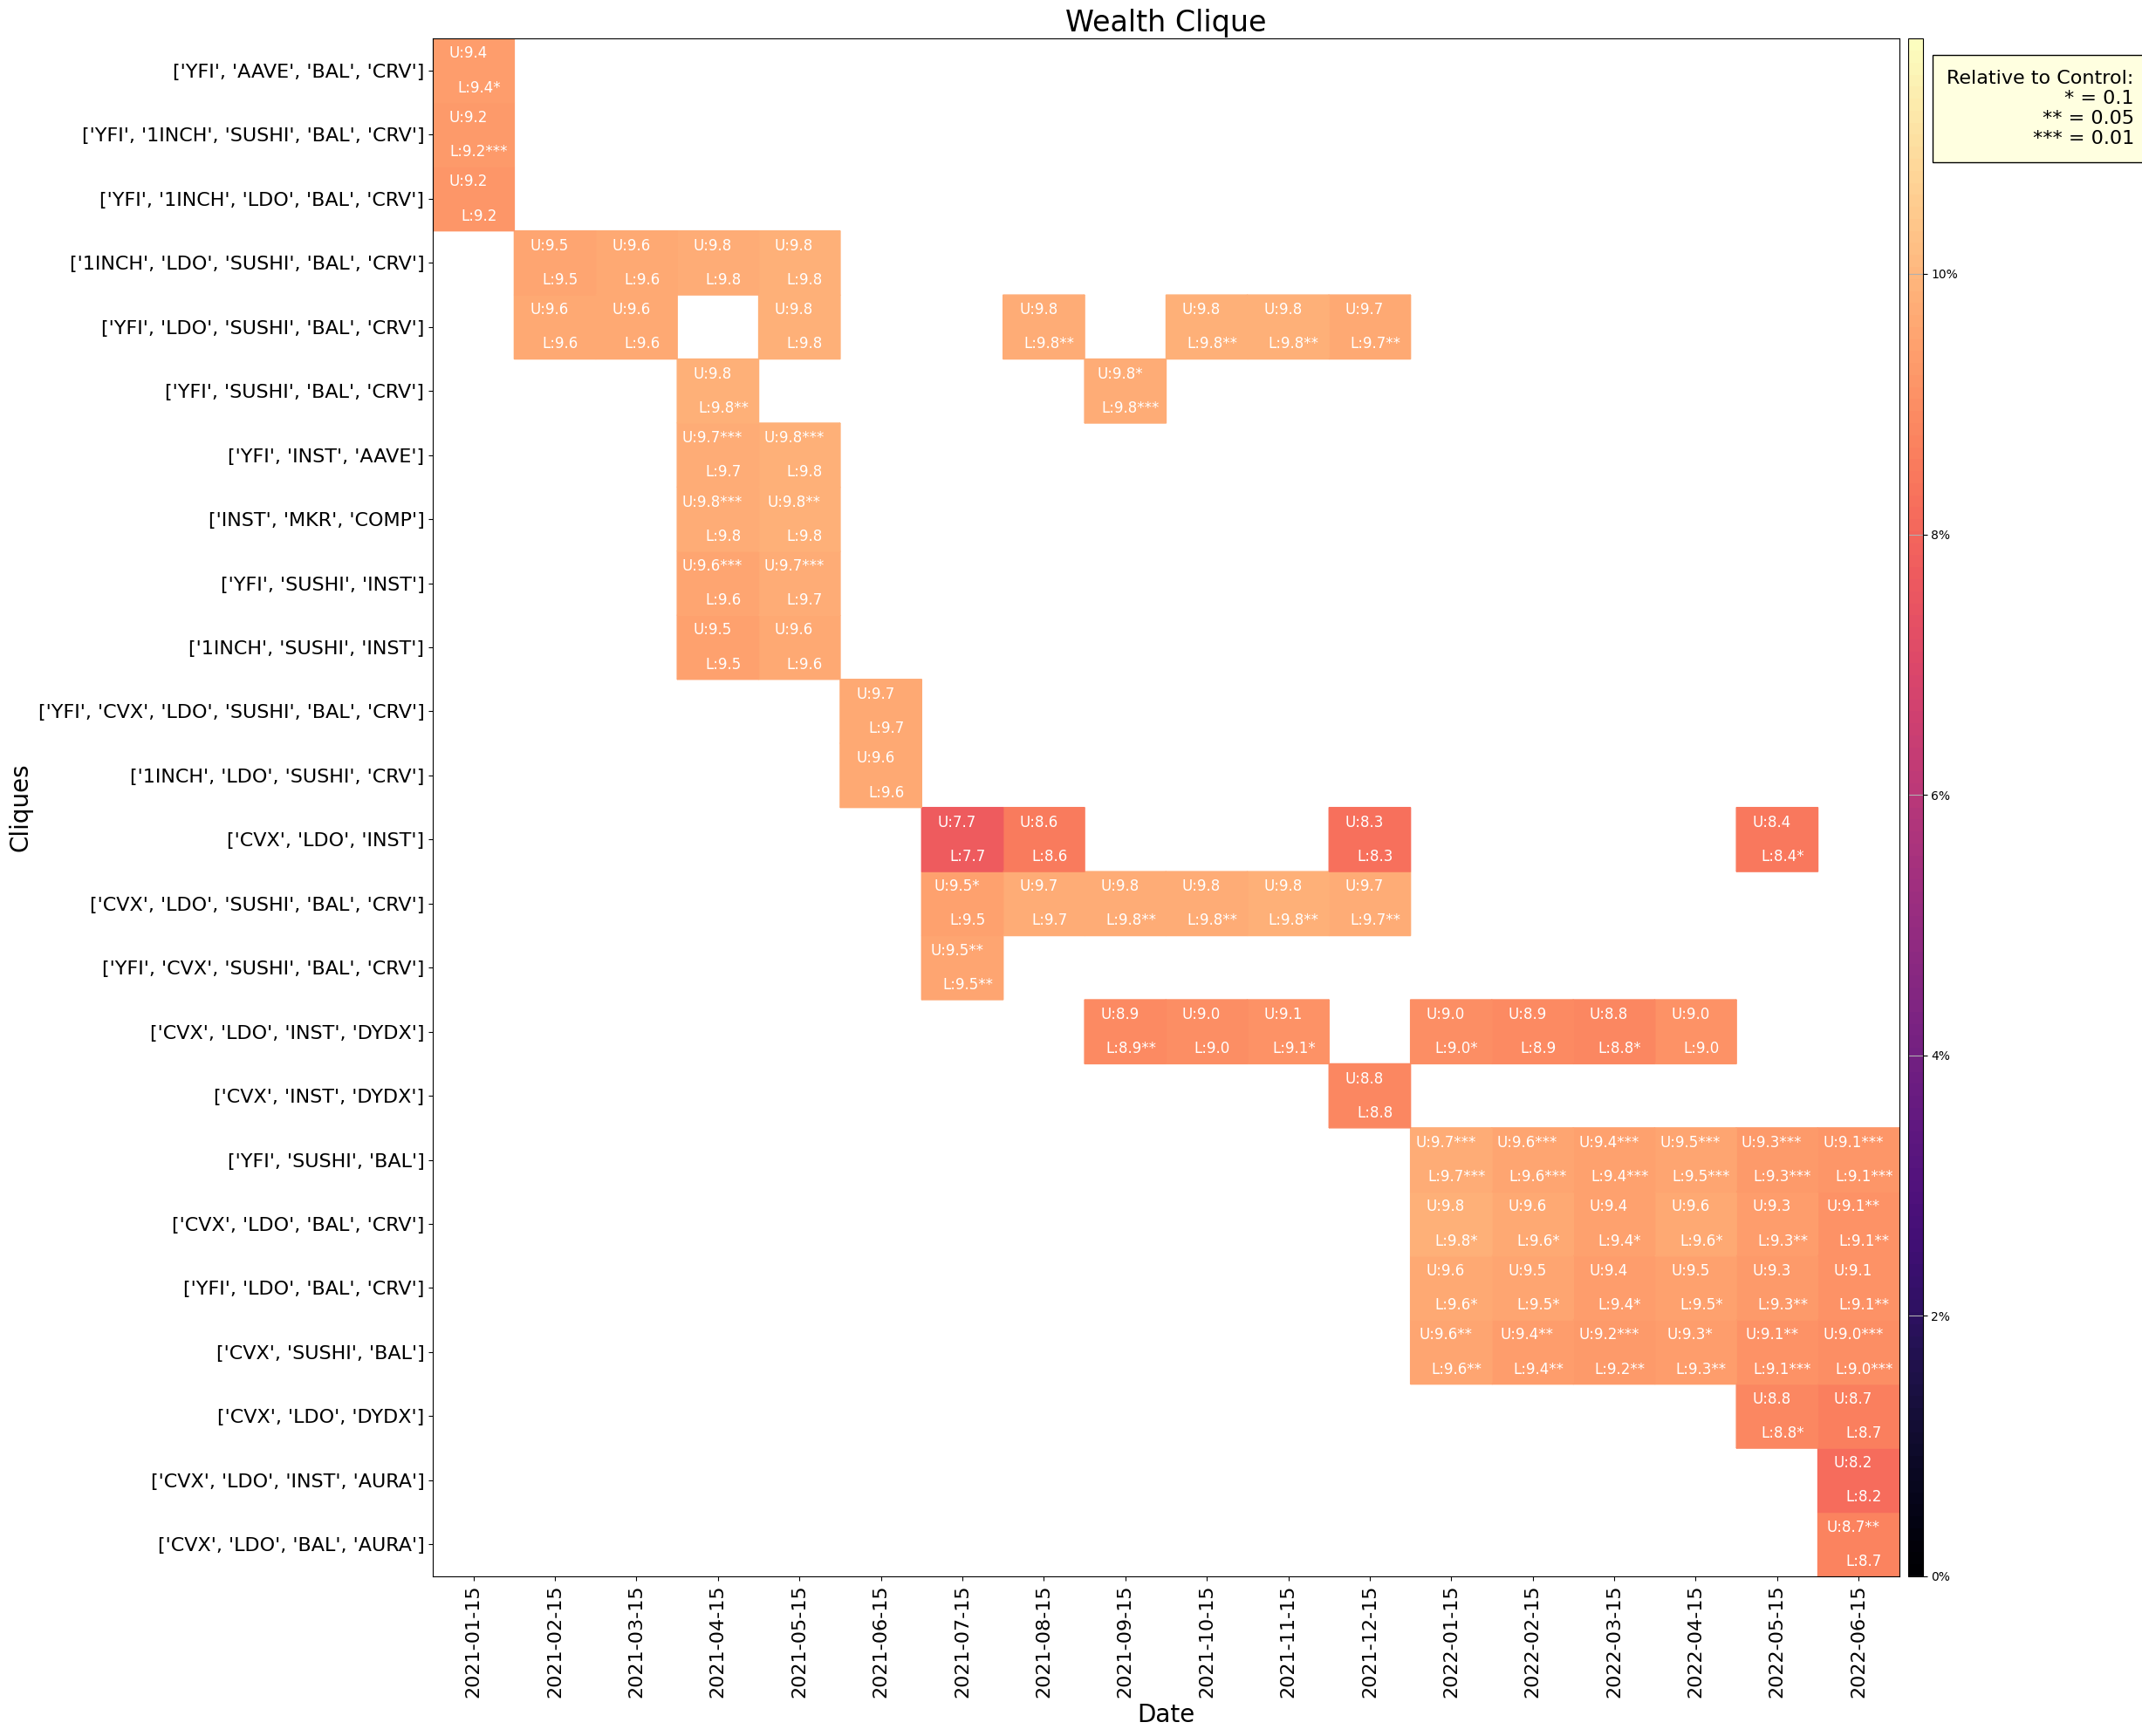

In [ ]:
plot_heatmap_chart(metric_dataframes, metric_name='wealth_clique', pct=False, log=True, save=False, show=True) 

### Fig: gini_wealth_clique

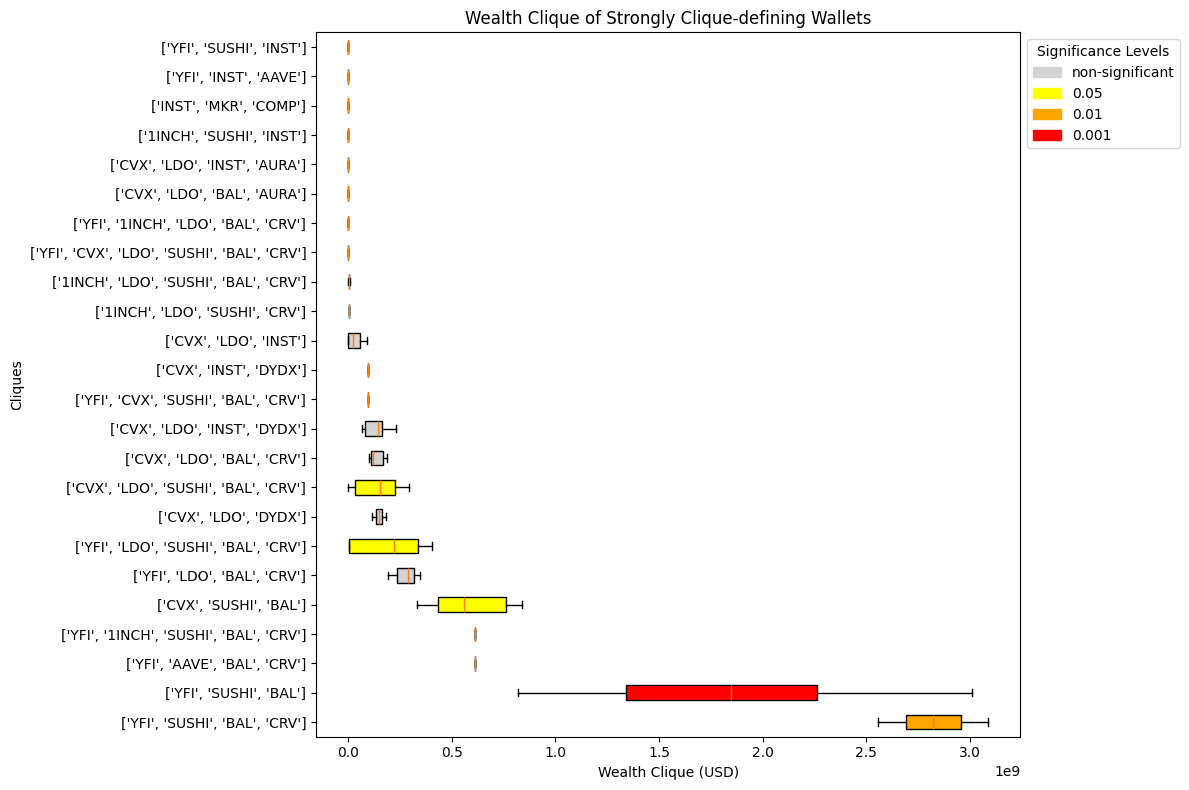

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='strong_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

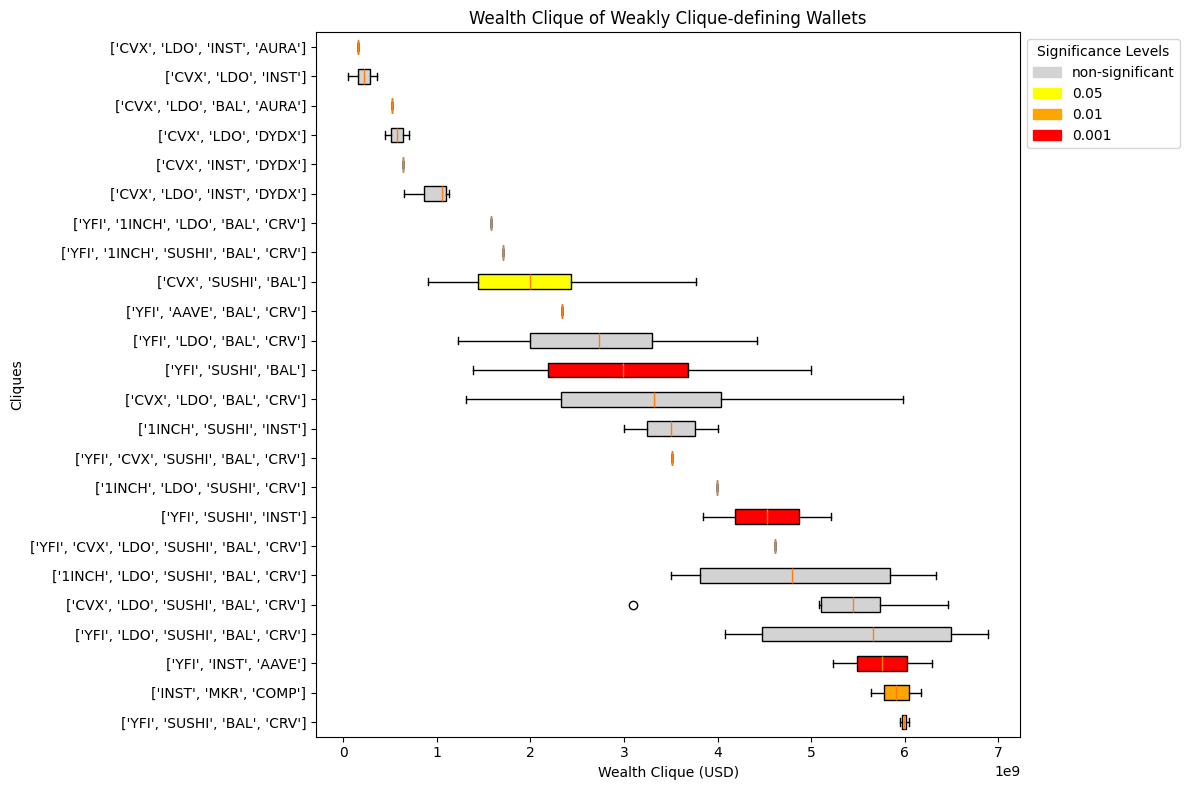

In [ ]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='weak_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

### Fig: median_wealth_level_clique || Note: This is the median position size in a clique

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


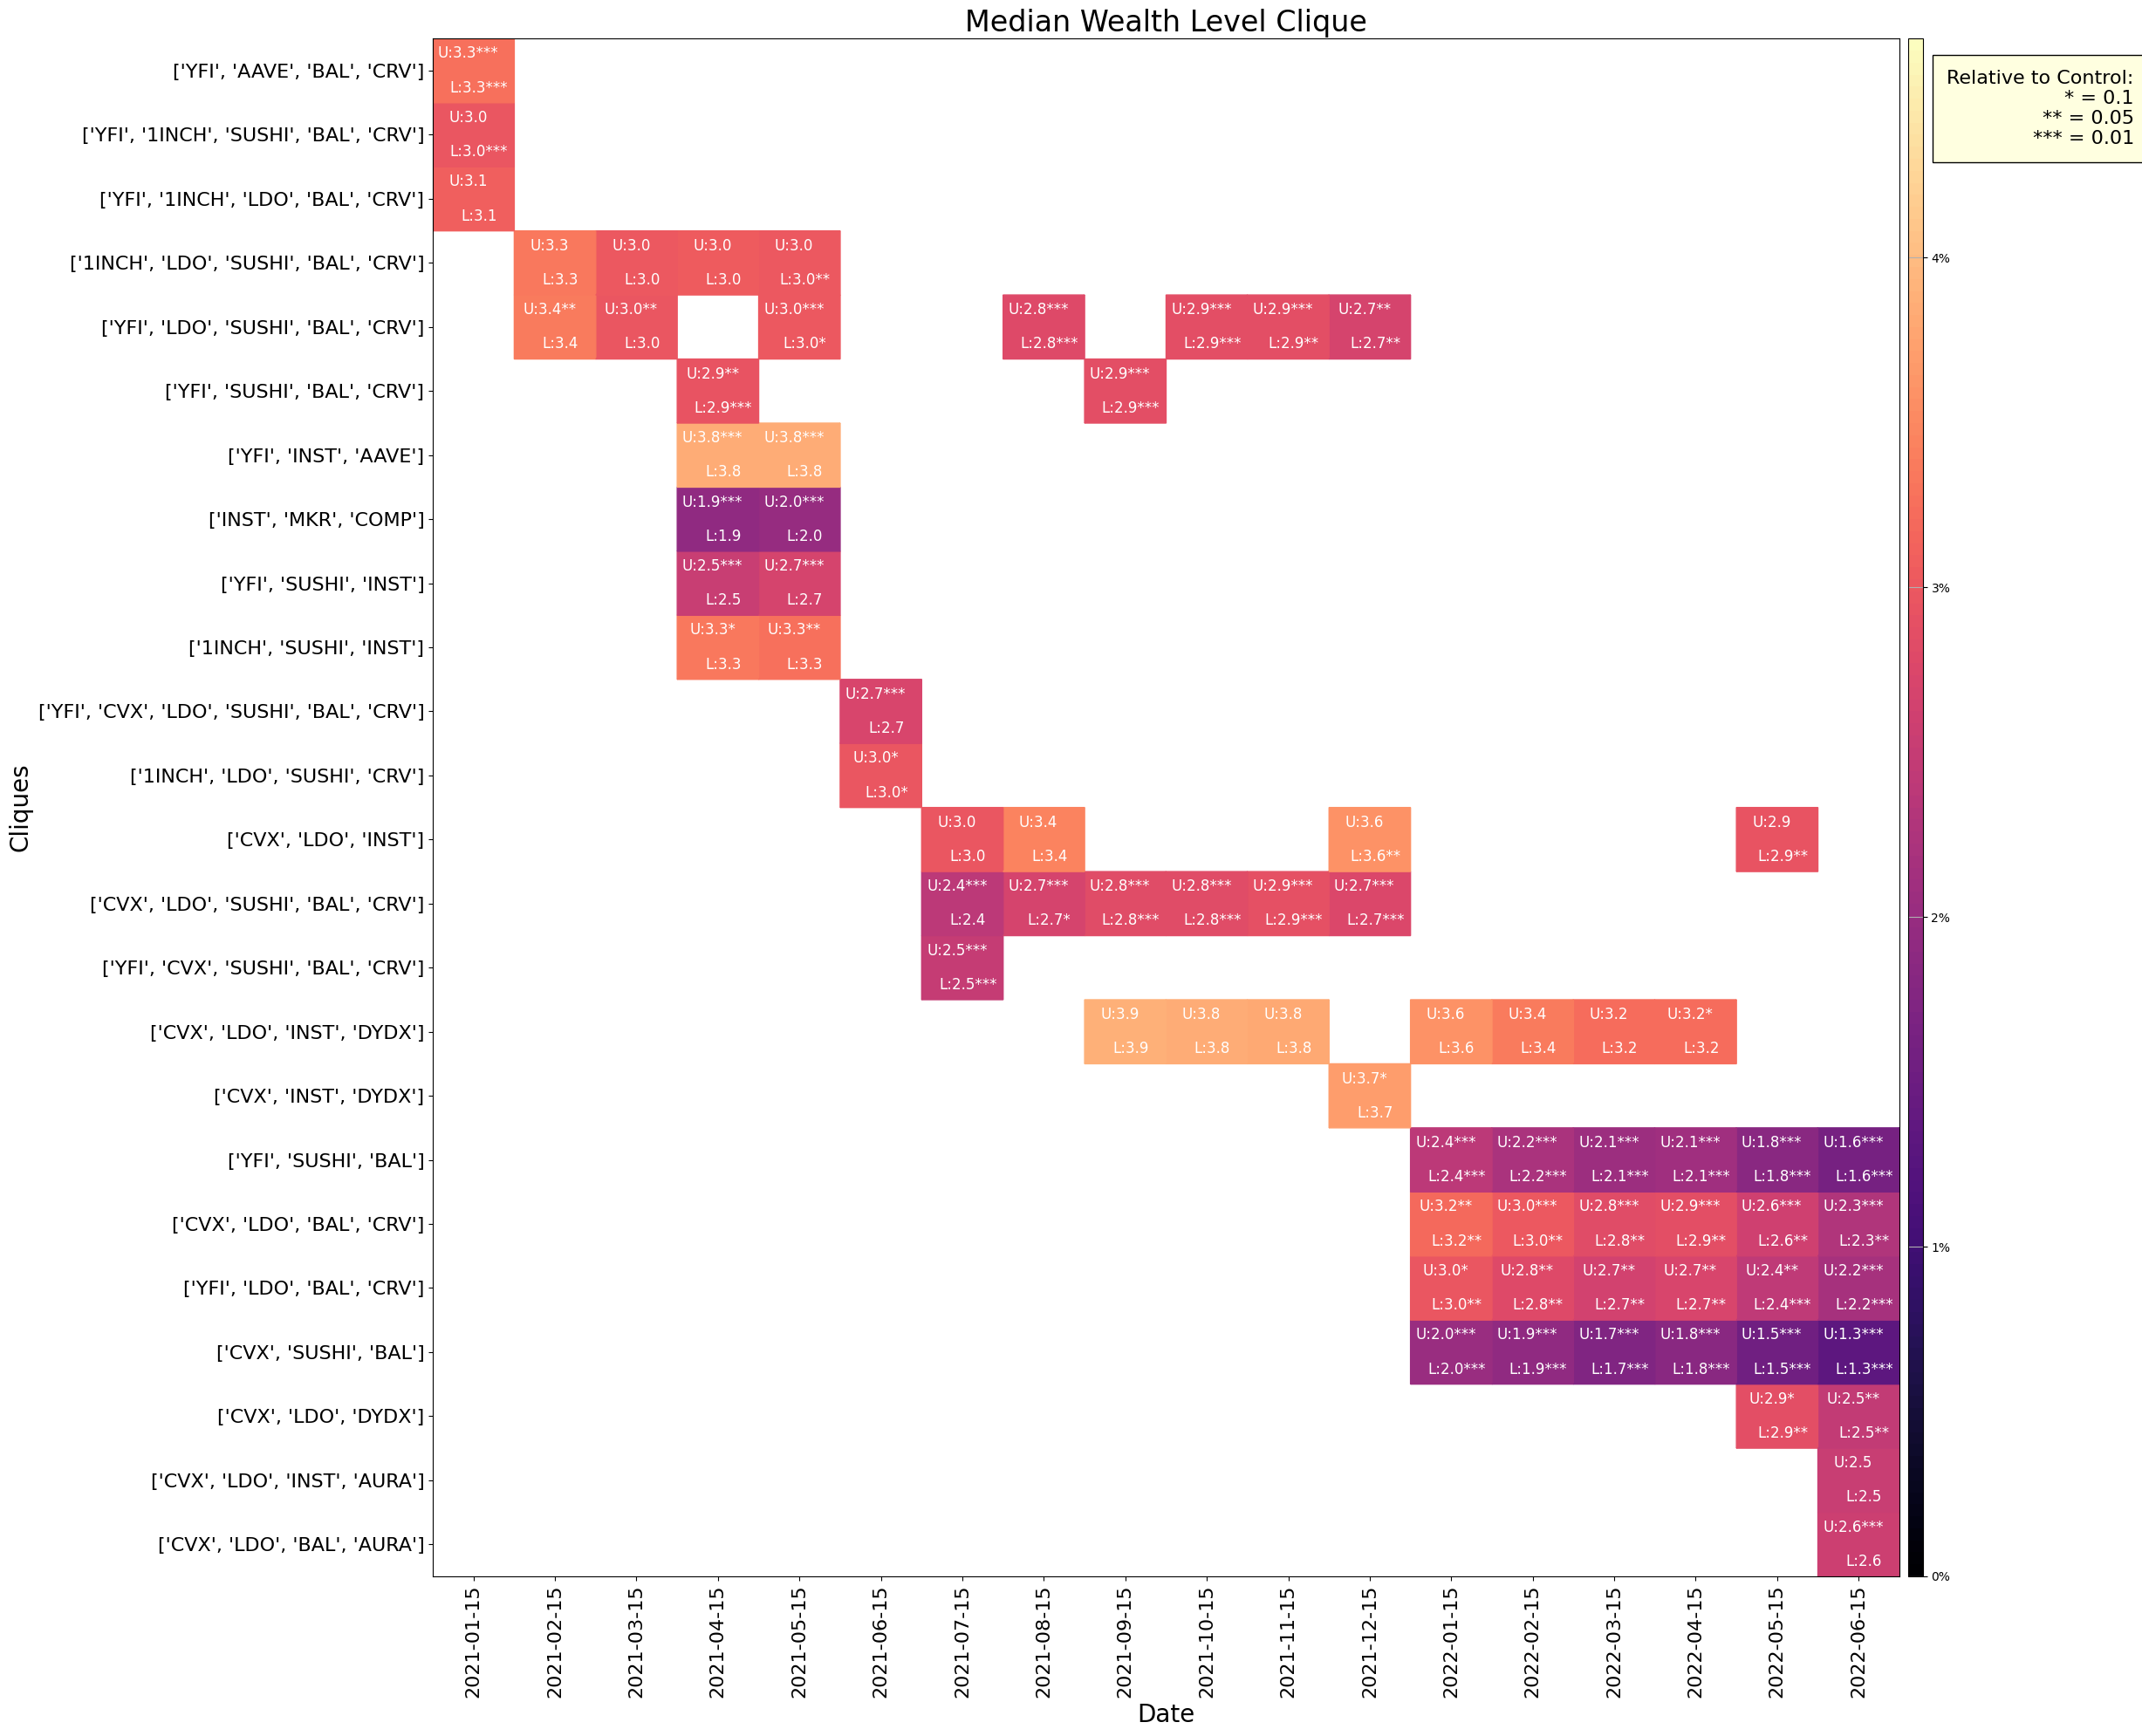

In [ ]:
plot_heatmap_chart(metric_dataframes, metric_name='median_wealth_level_clique', pct=False, log=True, save=False, show=True)

### Fig: median_no_assets_clique


/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


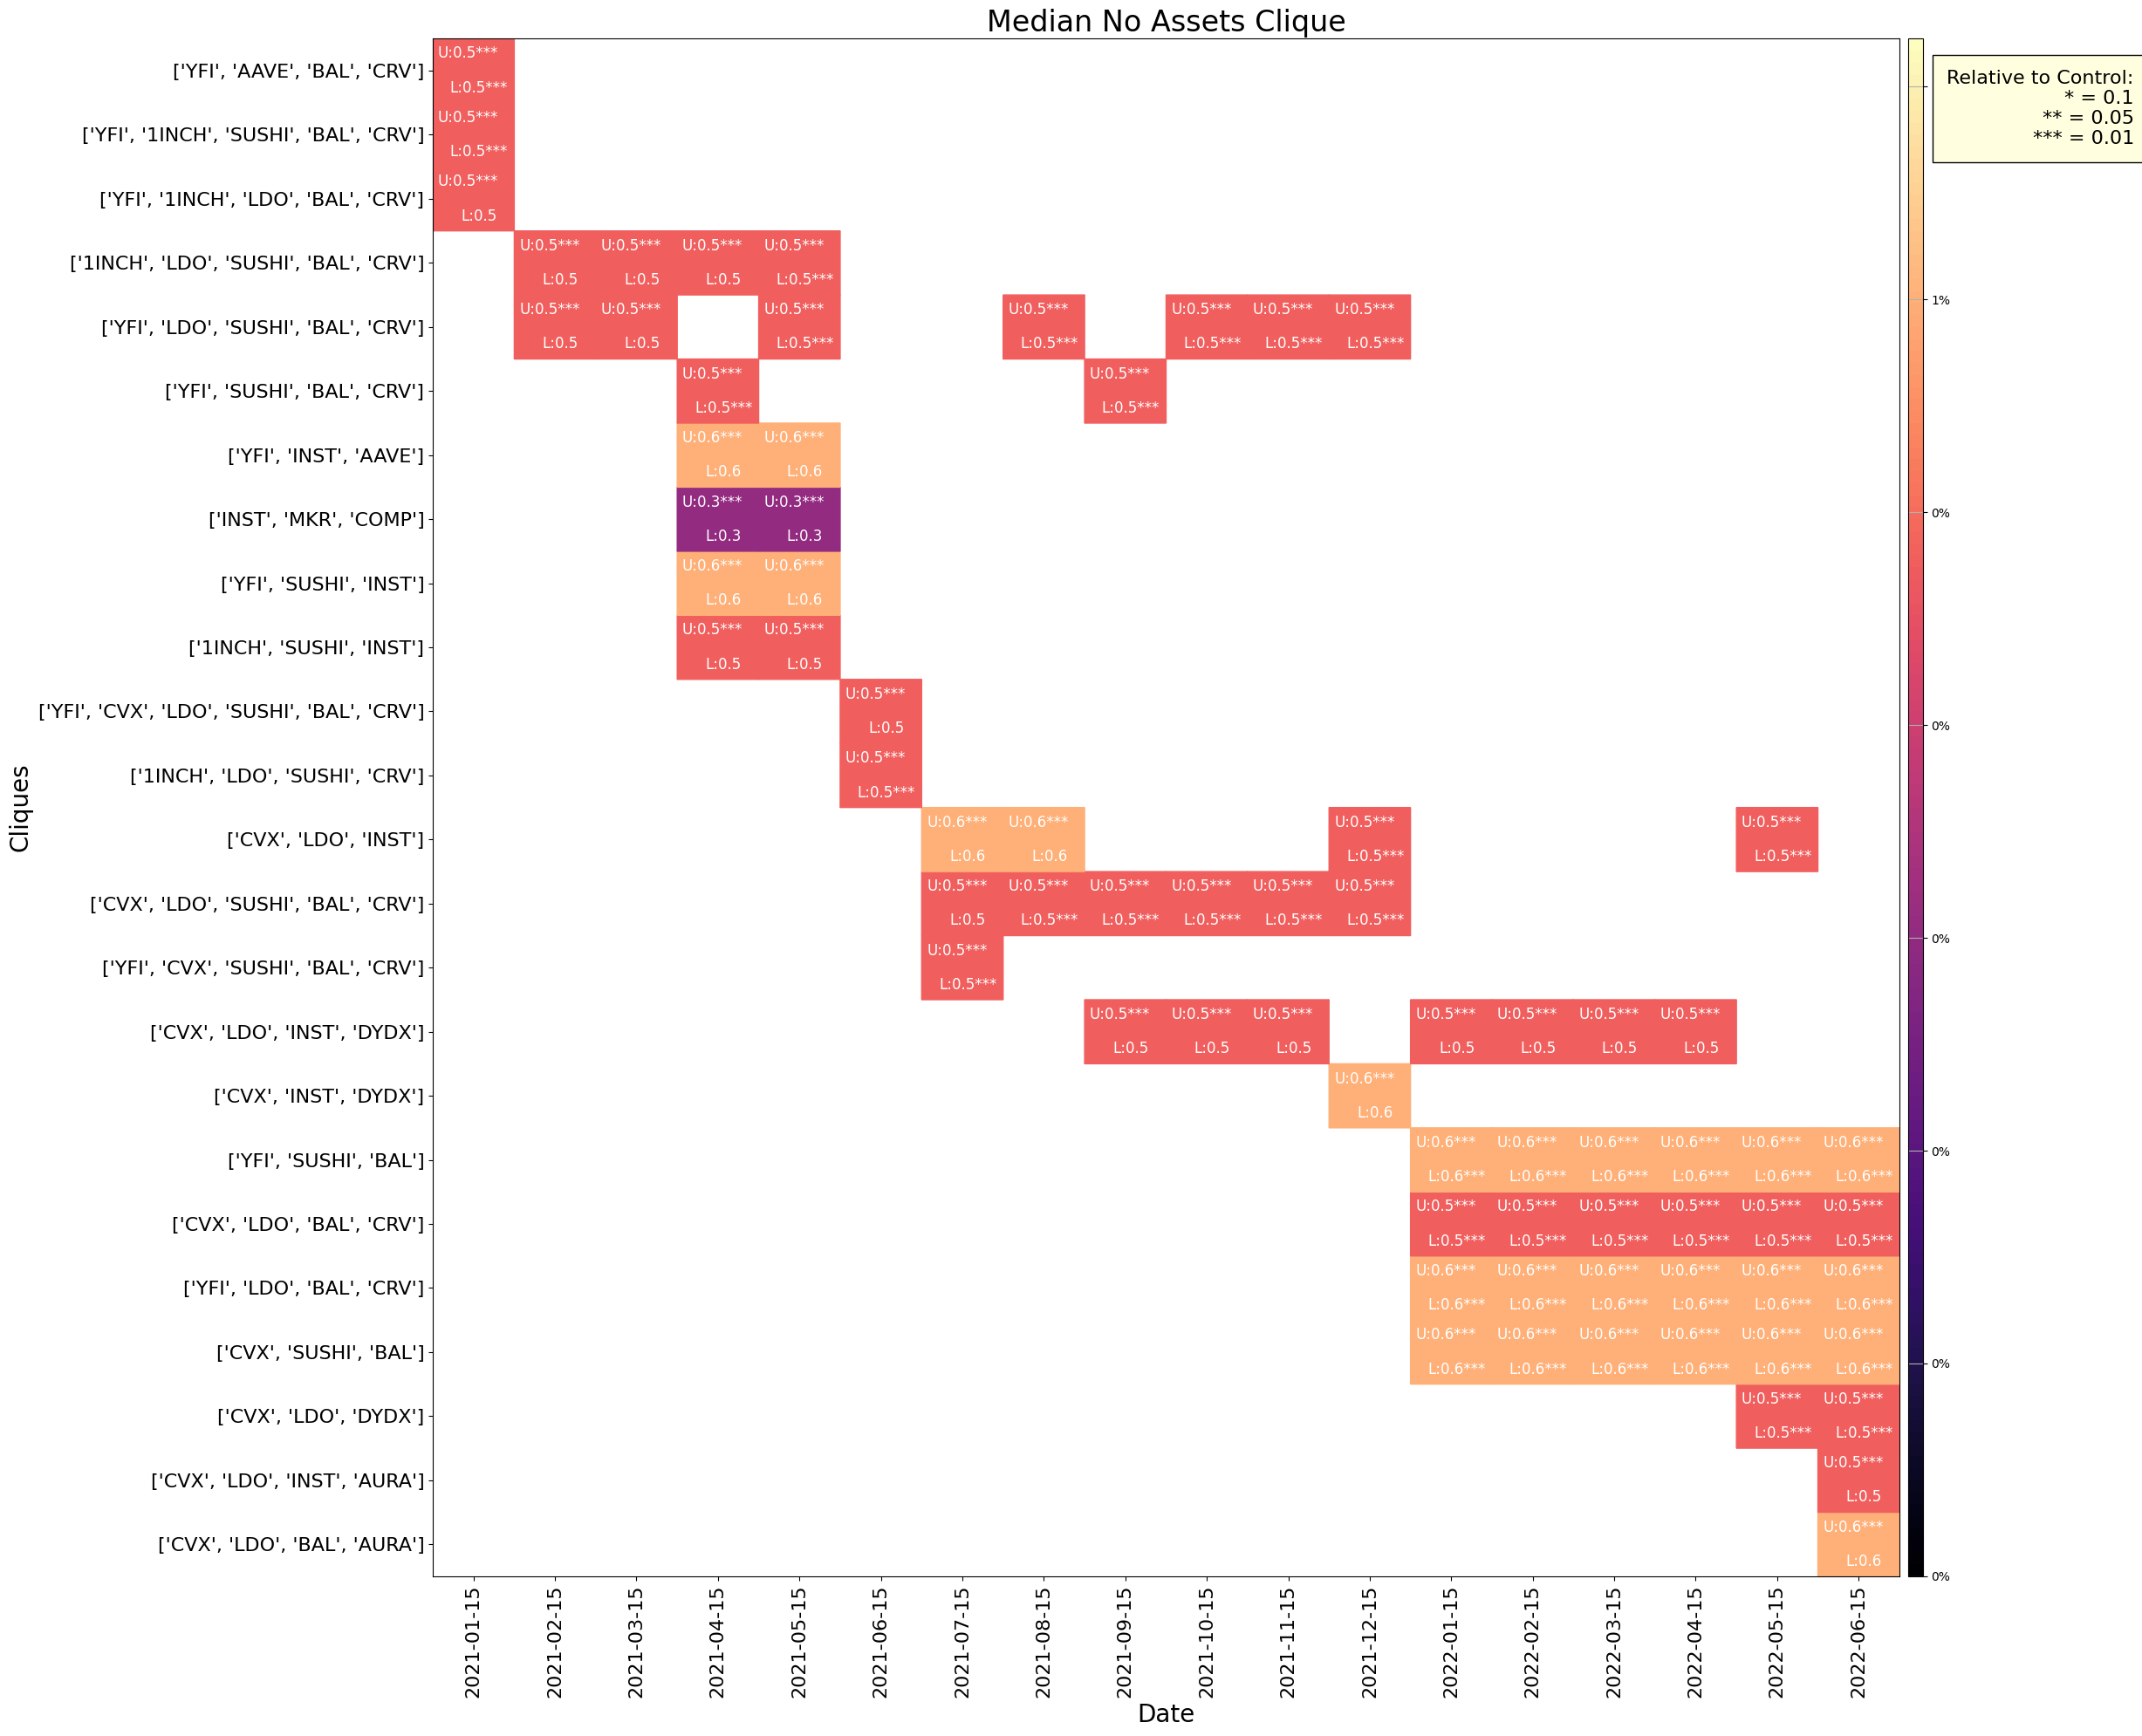

In [ ]:
plot_heatmap_chart(metric_dataframes, metric_name='median_no_assets_clique', pct=False, save=False, show=True)

### Fig: Distribution of Labels

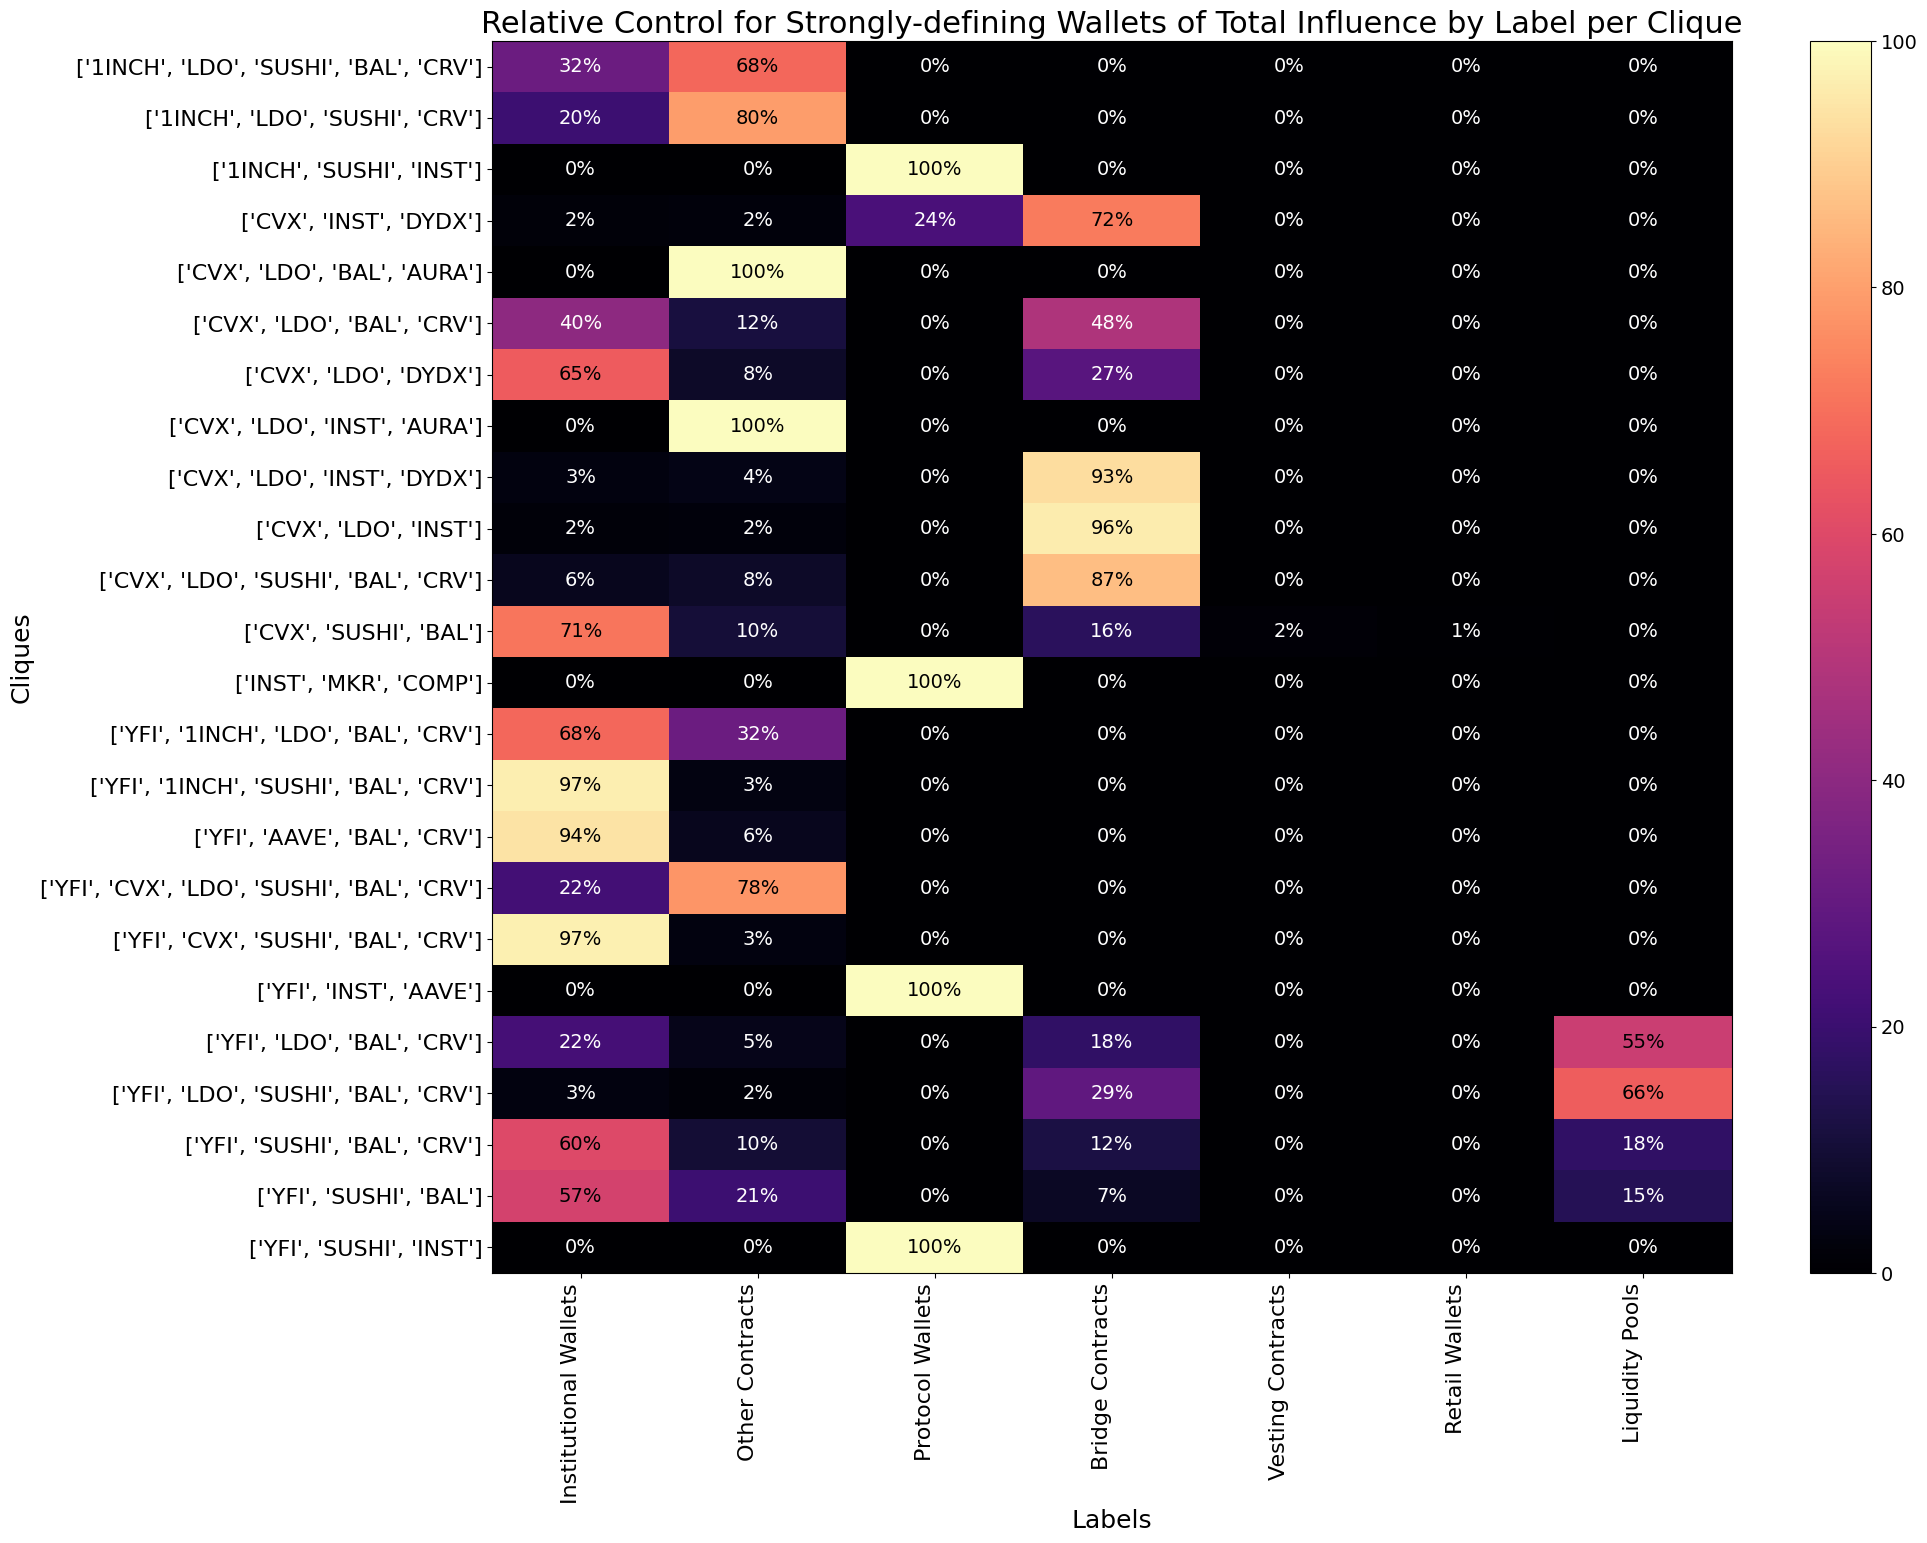

In [ ]:
plot_heatmap_labels(metric_dataframes, method='strong_estimate', group='sample', colormap='magma', output_path='../output/cliques')

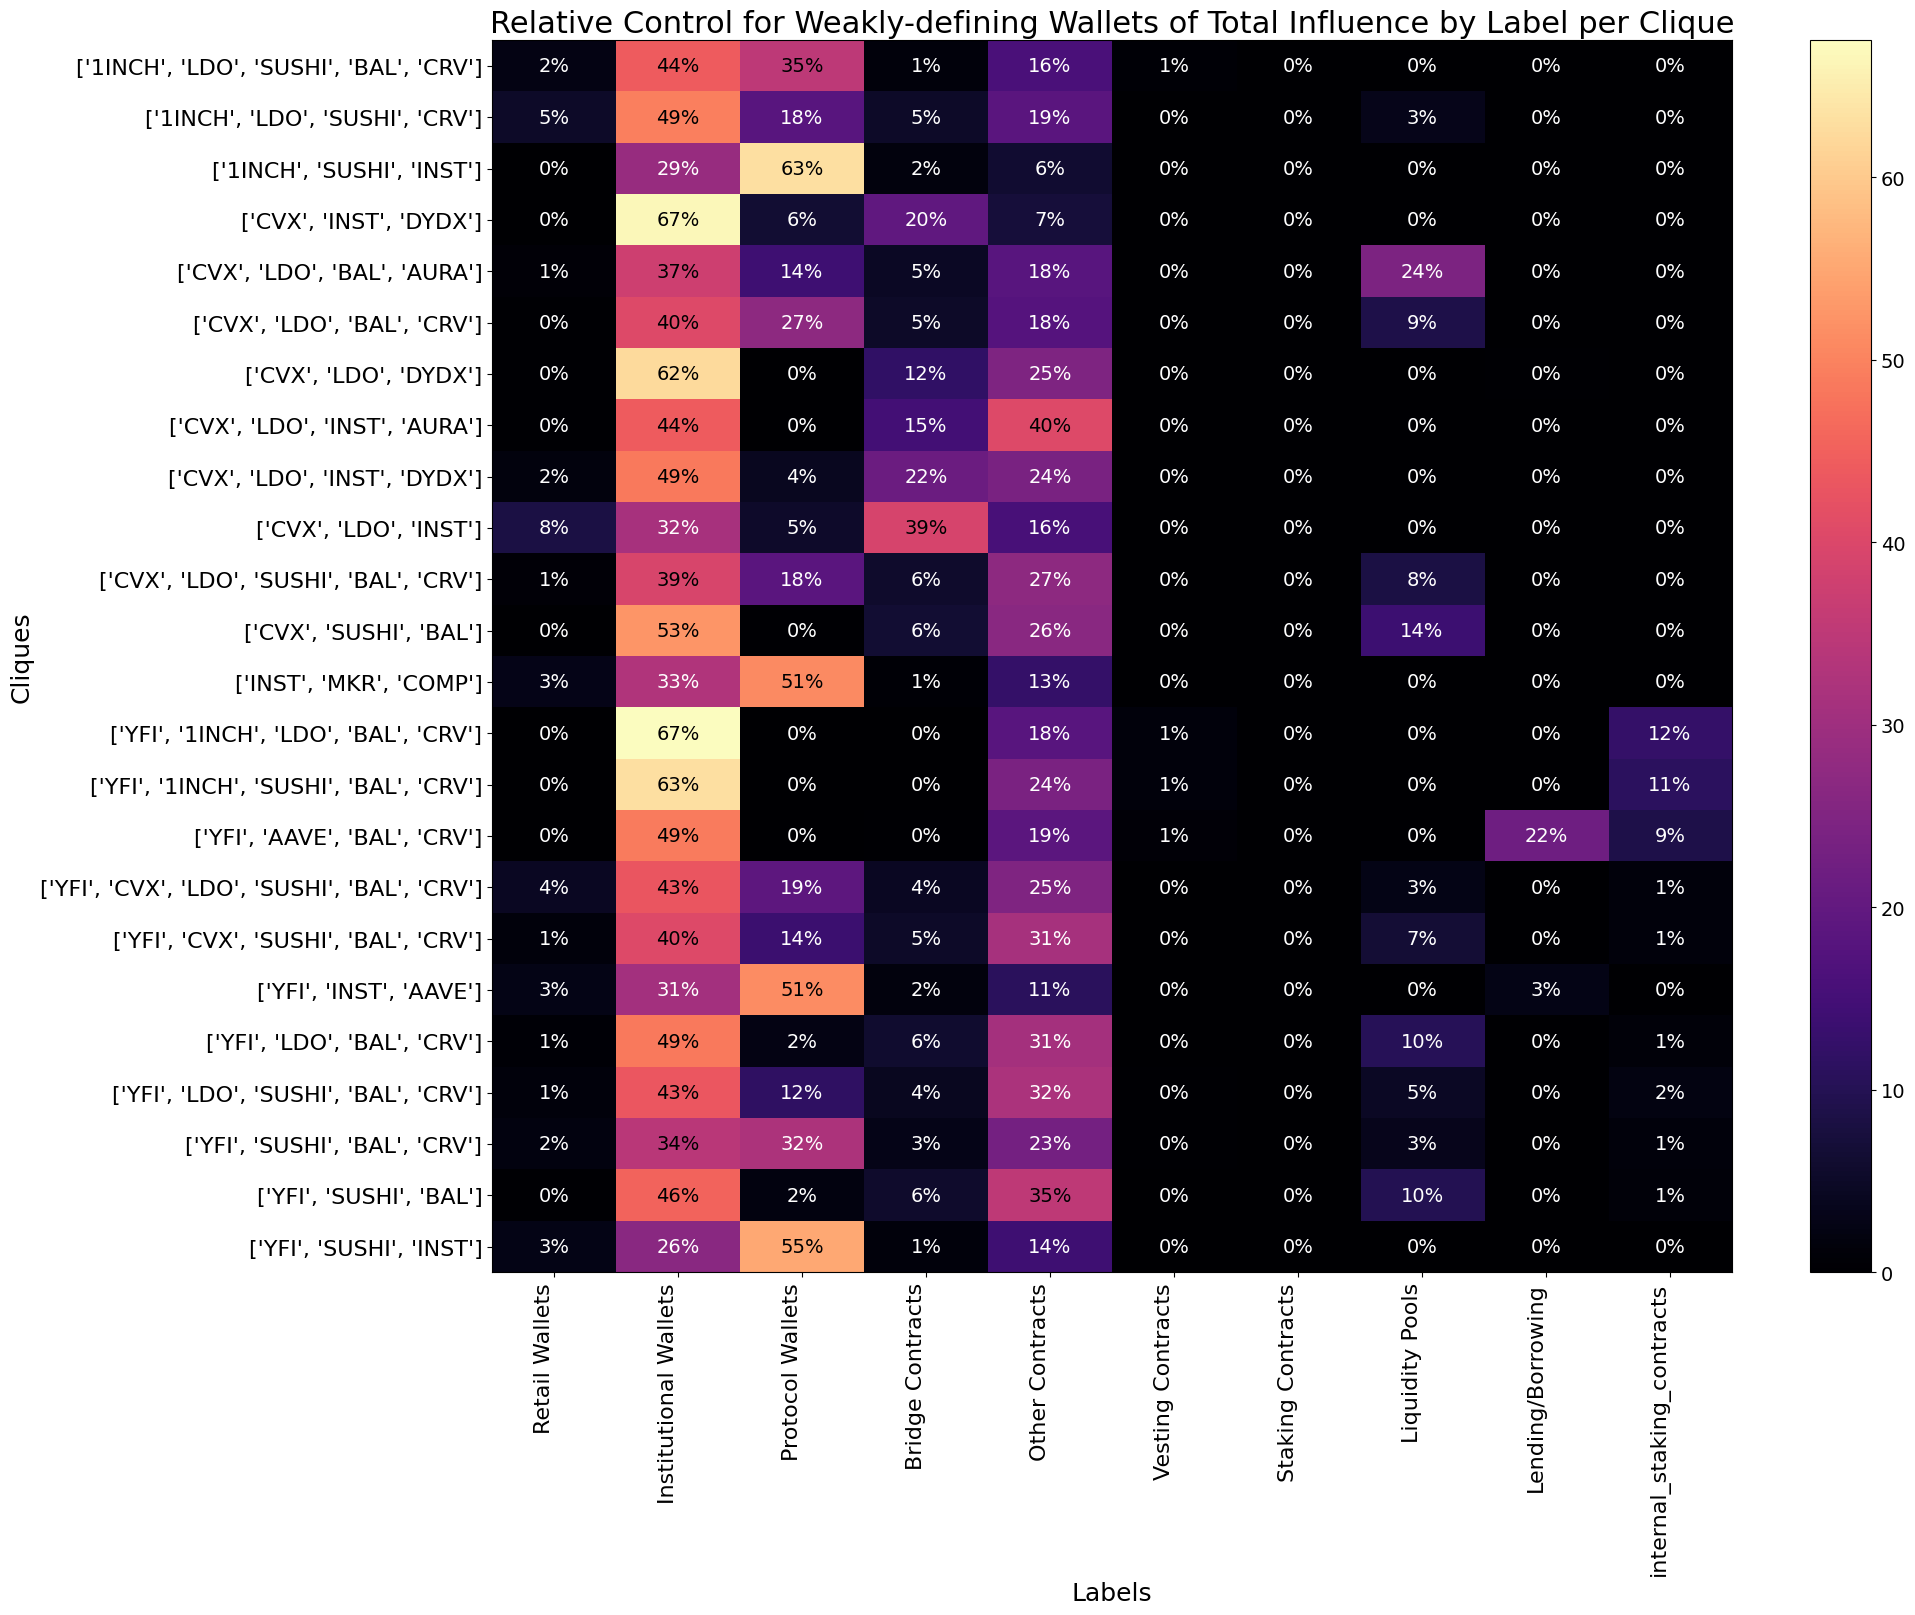

In [ ]:
plot_heatmap_labels(metric_dataframes, method='weak_estimate', group='sample', colormap='magma', output_path='../output/cliques')